# <a class="anchor" id="Introduction"><span style="color:#800080; font-weight:bold">Bertelsmann Arvato Project</a></span>


## Table of Contents

[**Part 1 : Introduction**](#Introduction)

   1.1 [Data Overview](#Data_Overview)  
   1.2 [Objectives](#Objectives)  
   1.3 [Business Relevance](#Business_Relevance)

[**Part 2 : Customer Segmentation Report for General Population Data** `(df)`](#Customer_Segmentation_Report_for_General_Population_Data_df)

   2.1 [Data Cleaning `(df)`](#Data_Cleaning_df)  
   2.2 [PCA `(df)`](#PCA_df)  
   2.3 [KMeans Clustering `(df)`](#KMeans_Clustering_df)  
   2.4 [Interpretation and Visualization of Top Numerical Features `(df)`](#Interpretation_and_Visualization_of_Top_Numerical_Features_df)  
   2.5 [Interpretation and Visualization of Categorical Features `(df)`](#Interpretation_and_Visualization_of_Categorical_Features_df)  
   2.6 [Cluster Characteristics Summary and PCA Components Interpretation `(df)`](#Cluster_Characteristics_Summary_and_PCA_Components_Interpretation_df)  
   2.7 [Customer Segmentation Final Report for General Population Data `(df)`](#Customer_Segmentation_Final_Report_for_General_Population_Data_df)

[**PART 3: Customer Segmentation Report for Customer Data** `(df_customers)`](#Customer_Segmentation_Report_for_CUSTOMER_Data_df_customers)

   3.1 [Data Cleaning `(df_customers)`](#Data_Cleaning_df_customers)  
   3.2 [PCA `(df_customers)`](#PCA_df_customers)  
   3.3 [KMeans Clustering `(df_customers)`](#KMeans_Clustering_df_customers)  
   3.4 [Interpretation and Visualization of Top Numerical Features `(df_customers)`](#Interpretation_and_Visualization_of_Top_Numerical_Features_df_customers)  
   3.5 [Interpretation and Visualization of Categorical Features `(df_customers)`](#Interpretation_and_Visualization_of_Categorical_Features_df_customers)  
   3.6 [Cluster Characteristics Summary and PCA Components Interpretation `(df_customers)`](#Cluster_Characteristics_Summary_and_PCA_Components_Interpretation_df_customers)  
   3.7 [Customer Segmentation Final Report for Customer Data `(df_customers)`](#Customer_Segmentation_Final_Report_for_Customer_Data_df_customers)

[**PART 4: Supervised Learning Model** `(df_train)`](#Supervised_Learning_Model_df_train)

   4.1 [Exploratory Data Analysis](#Exploratory_Data_Analysis)  
   4.2 [Structure and Flow: Clustering Rationale and Statistical Methods](#Structure_and_Flow_Clustering_Rationale_and_Statistical_Methods)  
   4.3 [Basic Checks for Patterns in Missing Data](#Basic_Checks_for_Patterns_in_Missing_Data)  
   4.4 [Data Cleaning](#Data_Cleaning)  
   4.5 [Fitting and Predicting on Classification Models](#Fitting_and_Predicting_Classification_Models)  
   4.6 [GridSearchCV : Finding Best Parameters](#GridSearchCV_Finding_Best_Parameters)  
   4.7 [Testing Best Model with Best Parameters](#Testing_Best_model_with_Best_Parameters)

[**Part 5 : Predict Results from Test Data using Best Supervised Learning Model** `(df_test)`](#Predict_Results_from_Test_Data_using_Best_Supervised_Learning_Model_df_test)

   5.1 [Data Cleaning](#Data_Cleaning)  
   5.2 [Predicting Results for Test Data](#Predicting_Results_for_Test_Data)

[**Part 6 : Final Segmentation Reports and Prediction Results**](#Final_Segmentation_Reports_and_Prediction_Results)

   6.1 [Customer Segmentation Final Report for General Population Data `(df)`](#Customer_Segmentation_Report_df)     
   6.2 [Customer Segmentation Final Report for Customer Data `(df_customers)`](#Customer_Segmentation_Report_df_customers)  
   6.3 [Prediction Results for Test Data](#Prediction_Results_for_Test_Data)  

[**Part 7 : Conclusion and Key Outcomes**](#Conclusion_and_Key_Outcomes)



# <a class="anchor" id="Introduction"><span style="color:#0d47a1; font-weight:bold">Part 1 : Introduction</a></span>


Arvato Financial Solutions aims to revoluti/onize customer acquisition for a mail-order company specializing in organic products. The company faces a significant challenge: efficiently identifying potential customers from the general population of Germany while minimizing costs and maximizing conversion rates. This challenge is particularly important in a competitive marketplace, where targeted marketing strategies can provide a substantial business advantage.

## <a id="Data_Overview"><span style="color:#0d47a1">1.1 Data Overview</a></span>

The project utilizes four key datasets:
- **General Population Data** (`Udacity_AZDIAS_052018.csv`, referred to as `df`): Contains demographic and lifestyle information representing the general population of Germany.
- **Customer Data** (`Udacity_CUSTOMERS_052018.csv`, referred to as `df_customers`): Provides detailed attributes of individuals who are already customers of the company, offering a foundation for comparative analysis.
- **Training Dataset** (`Udacity_MAILOUT_052018_TRAIN.csv`, referred to as `df_train`): Includes labeled data indicating whether individuals responded to a past marketing campaign, used for supervised model training.
- **Test Dataset** (`Udacity_MAILOUT_052018_TEST.csv`, referred to as `df_test`): Unlabeled data used to evaluate the predictive performance of the trained model.

Together, these datasets enable a thorough analysis of customer behavior and support the development of effective segmentation and prediction strategies.

## <a id="Objectives"><span style="color:#0d47a1">1.2 Objectives</a></span>
This project leverages data science to address these challenges by:
1. **Customer Segmentation Report**:
   - Using unsupervised learning methods, such as clustering and dimensionality reduction (e.g., PCA), to analyze and segment both the general population and the company’s existing customers.
   - Identifying unique customer groups based on demographic and behavioral attributes to uncover patterns and actionable insights.
2. **Supervised Learning Model**:
   - Building a machine learning model that predicts the likelihood of an individual responding to a marketing campaign. The model is trained and evaluated using datasets that incorporate insights from the customer segmentation analysis.

## <a id="Business_Relevance"><span style="color:#0d47a1">1.3 Business Relevance</a></span>
Customer segmentation and predictive modeling offer several advantages that are critical to business success:
- **Optimize Marketing Campaigns**: By targeting specific customer segments, resources can be allocated more efficiently, reducing costs associated with untargeted advertising.
- **Enhance Customer Satisfaction**: By tailoring product recommendations to individual preferences, the company can create more personalized and engaging customer experiences.
- **Improve ROI**: By focusing efforts on high-potential individuals, the company can increase conversion rates and build a base of loyal customers.

Through this data-driven approach, Arvato Financial Solutions can ensure its marketing strategies are both effective and impactful. Industries such as retail, e-commerce, and finance have successfully used similar methods to achieve measurable improvements in customer engagement and profitability.

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore") # Ensuring all warnings are suppressed

# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Model selection and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    precision_recall_curve,
    auc,
)

# Classifiers
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)

# Additional libraries
from imblearn.under_sampling import RandomUnderSampler
from datetime import datetime, date
from time import time,ctime
import itertools
from itertools import product
from scipy.stats import skew
import missingno as msno
from scipy import stats
from subprocess import call
import joblib
from IPython.core.interactiveshell import InteractiveShell

# Matplotlib inline for Jupyter Notebook
%matplotlib inline

In [2]:
#Downloading Datasets from Google Drive
import gdown

# Define file IDs and output filenames
files = {
    "Udacity_MAILOUT_052018_TRAIN.csv": "1xXsOkTMuKt5rglVPDPQVm2YEif2jJ_ym",
    "Udacity_MAILOUT_052018_TEST.csv": "1asz2EfTK2kdRf3xK90oJNBRNTetUckwU",
    "Udacity_CUSTOMERS_052018.csv": "1nLYtoO-7Ez8UzgxQeSvUS5E2AaLH3tZ8",
    "Udacity_AZDIAS_052018.csv": "1K8uqdNG-h0bpKlOTGB-lN8jrtzL3MV-a"
}

# Create 'data' directory if it doesn't exist
import os
os.makedirs("../data", exist_ok=True)

# Download each file
for filename, file_id in files.items():
    gdown_url = f"https://drive.google.com/uc?id={file_id}"
    output_path = f"../data/{filename}"
    print(f"Downloading {filename}...")
    gdown.download(gdown_url, output_path, quiet=True)
print("✅ All files downloaded successfully!")

✅ All files downloaded successfully!


In [3]:
# Importing datasets
file_paths = {
    "general_population": "../data/Udacity_AZDIAS_052018.csv",
    "customers": "../data/Udacity_CUSTOMERS_052018.csv",
    "train": "../data/Udacity_MAILOUT_052018_TRAIN.csv",
    "test": "../data/Udacity_MAILOUT_052018_TEST.csv"
}

df = pd.read_csv(file_paths["general_population"], delimiter=';')
df_customers = pd.read_csv(file_paths["customers"], delimiter=';')
df_train = pd.read_csv(file_paths["train"], delimiter=';')
df_test = pd.read_csv(file_paths["test"], delimiter=';')

# Display dataset shapes
print(f"Shape of Population dataset: {df.shape}")
print(f"Shape of customers dataset: {df_customers.shape}")
print(f"Shape of training dataset: {df_train.shape}")
print(f"Shape of test dataset: {df_test.shape}")

Shape of Population dataset: (891221, 366)
Shape of customers dataset: (191652, 369)
Shape of training dataset: (42962, 367)
Shape of test dataset: (42833, 366)


In [4]:
def clean_dataframes(df):
    """
    Cleans and preprocesses a given DataFrame by handling missing values, encoding categorical variables,
    and ensuring compatibility with training data when `test=1`.

    Steps involved:
    1. Identifies numeric columns and calculates skewness.
    2. Imputes missing values in skewed numeric columns using the median.
    3. Imputes missing values in normally distributed numeric columns using the mean.
    4. Converts specific categorical columns to string format to prevent inconsistencies.
    5. Extracts the year from the 'EINGEFUEGT_AM' column and converts it to a string.
    6. Applies one-hot encoding to categorical variables.
    7. Ensures compatibility with training features by removing unseen columns when `test=1`.
    8. Removes columns corresponding to missing values ('_nan') to avoid the dummy variable trap.

    Parameters:
    df (pd.DataFrame): The input DataFrame to be cleaned.
    test (int, optional): If set to 1, ensures the test dataset has the same features as the training dataset. Defaults to 0.
    
    Returns:
    pd.DataFrame: A cleaned and preprocessed DataFrame ready for modeling.
    """
    
    df = df.copy()  # Avoid modifying the original DataFrame
        
    # Identify skewed and normal numeric columns
    numeric_cols = df.select_dtypes(include=[float, int]).columns
    skewness = df[numeric_cols].apply(skew, nan_policy='omit')
    numeric_skewed_cols = skewness[skewness.abs() > 0.5].index  # Adjust threshold as needed
    numeric_normal_cols = skewness[skewness.abs() <= 0.5].index
    
    # Impute skewed columns with median
    skew_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    df[numeric_skewed_cols] = skew_imputer.fit_transform(df[numeric_skewed_cols])

    # Impute normal columns with mean
    normal_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    df[numeric_normal_cols] = normal_imputer.fit_transform(df[numeric_normal_cols])
    
    # Convert categorical columns to strings
    categorical_columns = ["CAMEO_DEU_2015", "CAMEO_DEUG_2015", "CAMEO_INTL_2015", "D19_LETZTER_KAUF_BRANCHE", "EINGEFUEGT_AM", "OST_WEST_KZ"]
        
    # Extract only the year from 'EINGEFUEGT_AM' and convert to string
    df["EINGEFUEGT_AM"] = pd.to_datetime(df["EINGEFUEGT_AM"], errors="coerce").dt.year.astype(str)
    #df["EINGEFUEGT_AM"].fillna('nan', inplace=True)

    for col in categorical_columns:
        df[col] = df[col].apply(lambda x: str(x) if pd.notna(x) else np.nan)
        df[col] = df[col].replace("nan", np.nan)  # Convert string "nan" to np.nan
            
    # Impute categorical columns with most_frequent
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_columns] = cat_imputer.fit_transform(df[categorical_columns])
    
    return df

In [5]:
def preprocess_dataframe(df, is_train=False, is_test=False, df_train_feature_names=None):
    """
    Preprocesses a given DataFrame by applying One-Hot Encoding (OHE) to categorical columns
    and ensuring consistency between training and test data.

    Parameters:
    df (pd.DataFrame): The input DataFrame to preprocess.
    is_train (bool, optional): If True, fit and save the ColumnTransformer. Defaults to False.
    is_test (bool, optional): If True, load saved ColumnTransformer and apply transform. Defaults to False.
    df_train_feature_names (list, optional): Feature names from the training set, required for test mode.
    
    Returns:
    pd.DataFrame: A transformed DataFrame with One-Hot Encoding applied and unnecessary columns removed.
    """
    df = df.copy()  # Avoid modifying the original DataFrame
    
    if is_train:
        # Fit transformer and save it
        cat_cols = df.select_dtypes(include=['object']).columns
        ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        ct = ColumnTransformer(transformers=[("one_hot_encoder", ohe, cat_cols)], remainder='passthrough')
        
        df_new = ct.fit_transform(df)
        joblib.dump(ct, "../model/trained_ct.pkl")
        df_feature_names = ct.get_feature_names_out()

    elif is_test:
        # Load transformer and transform
        ct = joblib.load("../model/trained_ct.pkl")
        df_new = ct.transform(df)
        df_feature_names = ct.get_feature_names_out()

    else:
        # For general (non-training/non-test) use
        cat_cols = df.select_dtypes(include=['object']).columns
        ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        ct = ColumnTransformer(transformers=[("one_hot_encoder", ohe, cat_cols)], remainder='passthrough')
        
        df_new = ct.fit_transform(df)
        df_feature_names = ct.get_feature_names_out()

    # Convert to DataFrame
    df_new = pd.DataFrame(df_new, columns=df_feature_names)

    # For test: ensure feature alignment
    if is_test and df_train_feature_names is not None:
        missing_cols = [col for col in df_feature_names if col not in df_train_feature_names]
        df_new = df_new.drop(columns=missing_cols, errors='ignore')

    # Remove dummy trap columns
    df_new = df_new.loc[:, ~df_new.columns.str.endswith("_nan")]

    return df_new

# <a class="anchor" id="Customer_Segmentation_Report_for_General_Population_Data_df"><span style="color:#0d47a1; font-weight:bold">Part 2 : Customer Segmentation Report for General Population Data `(df)`</a></span>

## <a class="anchor" id="Data_Cleaning_df"><span style="color:#0d47a1">2.1 : Data Cleaning `(df)`</a></span>

In [6]:
# Numeric columns with NaN values
df_numeric_cols = df.select_dtypes(include=[float, int]).columns
print("No of Numerical Columns : ",len(df_numeric_cols))

#Categorical columns
df_cat_cols = df.select_dtypes(include=['object']).columns
print("No of Categorical Columns : ",len(df_cat_cols))
print("Categorical Columns Names : ",df_cat_cols)

No of Numerical Columns :  360
No of Categorical Columns :  6
Categorical Columns Names :  Index(['CAMEO_DEU_2015', 'CAMEO_DEUG_2015', 'CAMEO_INTL_2015',
       'D19_LETZTER_KAUF_BRANCHE', 'EINGEFUEGT_AM', 'OST_WEST_KZ'],
      dtype='object')


In [7]:
#Data Cleaning
cleaned_df = clean_dataframes(df)
preprocessed_df = preprocess_dataframe(cleaned_df)

## Feature Scaling
df_sc = StandardScaler()
preprocessed_df_scaled = df_sc.fit_transform(preprocessed_df)

## <a class="anchor" id="PCA_df"><span style="color:#0d47a1">2.2 : PCA `(df)`</a></span>

In [8]:
# Apply PCA to the preprocessed data
df_pca = PCA(n_components=0.95)  # Retain 95% variance
df_pca_reduced_data = df_pca.fit_transform(preprocessed_df_scaled)

print(f"General Population(df) Reduced data shape: {df_pca_reduced_data.shape}")

General Population(df) Reduced data shape: (891221, 322)


## <a class="anchor" id="KMeans_Clustering_df"><span style="color:#0d47a1">2.3 : KMeans Clustering `(df)`</a></span>

#### 2.3.1 Deciding K value by elbow method for df

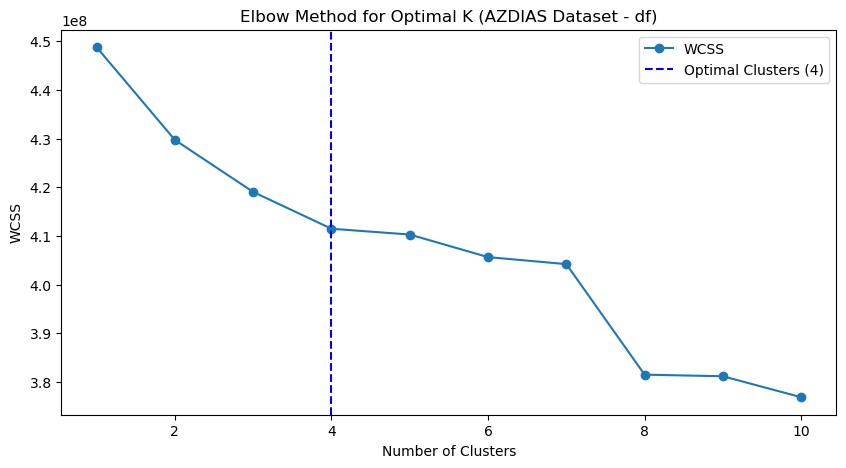

In [9]:
wcss_inertia = []
for k in range(1, 11):
    df_kmeans = KMeans(n_clusters=k, random_state=42)
    df_kmeans.fit(df_pca_reduced_data)
    wcss_inertia.append(df_kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss_inertia, marker='o', label='WCSS')
plt.axvline(x=4, color='blue', linestyle='--', label='Optimal Clusters (4)')
plt.title("Elbow Method for Optimal K (AZDIAS Dataset - df)")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.legend()
plt.show()

##### Elbow Method Analysis for df

The Elbow Method was used to determine the optimal number of clusters based on the Within-Cluster Sum of Squares (WCSS). 

###### Observations:
- A sharp decrease in WCSS is observed from **1 to 4 clusters**, indicating that each additional cluster significantly improves homogeneity within clusters.
- After **4 clusters**, the decrease in WCSS slows significantly, forming an "elbow" in the plot.

###### Conclusion:
- Choosing **4 clusters** balances the trade-off between minimizing WCSS and avoiding excessive complexity. This segmentation is appropriate for uncovering meaningful customer groups while maintaining interpretability.

#### 2.3.2 : KMeans Clustering for df

In [10]:
# Apply K-Means with chosen number of clusters (4)
df_kmeans = KMeans(n_clusters=4, random_state=42)
df_clusters = df_kmeans.fit_predict(df_pca_reduced_data)

df['Cluster'] = df_clusters
cleaned_df['Cluster'] = df_clusters

## <a class="anchor" id="Interpretation_and_Visualization_of_Top_Numerical_Features_df"><span style="color:#0d47a1">2.4 : Interpretation and Visualization of Top Numerical Features `(df)`</a></span>

#### 2.4.1. Cluster Sizes

In [11]:
# Size of each cluster
df_cluster_sizes = df['Cluster'].value_counts()
print(df_cluster_sizes)

Cluster
1    309367
2    264119
3    226298
0     91437
Name: count, dtype: int64


#### 2.4.2. Numerical Feature Insights

In [12]:
# Calculate skewness for all numerical columns
skewness = cleaned_df[df_numeric_cols].skew()

df_normal_cols = skewness[abs(skewness) < 0.5].index.tolist()
df_skewed_cols = skewness[abs(skewness) >= 0.5].index.tolist()

print(f"Number of Normal Columns: {len(df_normal_cols)}")
print(f"Number of Skewed Columns: {len(df_skewed_cols)}")

Number of Normal Columns: 185
Number of Skewed Columns: 175


In [13]:
# Combine all statistics for normal numerical columns
df_normal_summary = cleaned_df.groupby('Cluster')[df_normal_cols].agg(['mean', 'median', 'var', 'std'])

# Combine all statistics for skewed columns
df_skewed_summary = cleaned_df.groupby('Cluster')[df_skewed_cols].agg(['median', 'var', 'std'])

# Flatten column names for easier readability
df_normal_summary.columns = ['_'.join(col) for col in df_normal_summary.columns]
df_skewed_summary.columns = ['_'.join(col) for col in df_skewed_summary.columns]

# Concatenate all summaries
df_numerical_summary = pd.concat([df_normal_summary, df_skewed_summary], axis=1)

# Display the updated summary
df_numerical_summary

,LNR_mean,LNR_median,LNR_var,LNR_std,AKT_DAT_KL_mean,AKT_DAT_KL_median,AKT_DAT_KL_var,AKT_DAT_KL_std,ALTER_HH_mean,ALTER_HH_median,...,VERDICHTUNGSRAUM_std,VERS_TYP_median,VERS_TYP_var,VERS_TYP_std,VHA_median,VHA_var,VHA_std,WOHNDAUER_2008_median,WOHNDAUER_2008_var,WOHNDAUER_2008_std
Cluster,,,,,,,,,,,,,,,,,,,,,
0,645279.259589,653734.0,6.556943e+10,256065.289475,4.840888,4.421928,3.071493,1.752568,9.867421,10.864126,...,4.229182,-1.0,0.943246,0.971208,0.0,0.095953,0.309762,9.0,0.968348,0.984047
1,663057.150427,663748.0,6.043089e+10,245826.960551,4.797583,4.000000,14.448813,3.801159,8.906166,10.000000,...,7.647696,1.0,0.478316,0.691604,0.0,0.824881,0.908229,9.0,3.176841,1.782370
2,594050.304011,571955.0,7.393394e+10,271907.969188,5.345242,6.000000,13.256704,3.640976,10.070385,13.000000,...,9.217810,2.0,0.615425,0.784490,0.0,0.740470,0.860506,9.0,4.283166,2.069581
3,649196.169489,645730.5,6.201782e+10,249033.779277,2.661469,1.000000,7.021730,2.649855,14.869933,17.000000,...,7.765789,1.0,0.367531,0.606243,0.0,2.385428,1.544483,9.0,3.604960,1.898673


#### 2.4.3. Visualize Top Numerical Features

In [14]:
df_top_features_normal_cols = []
df_top_features_skewed_cols = []

# Mean for normal columns
df_normal_summary_mean = cleaned_df.groupby('Cluster')[df_normal_cols].mean()

# Median for skewed columns
df_skewed_summary_median = cleaned_df.groupby('Cluster')[df_skewed_cols].median()

# Combine summaries
df_numerical_summary_mean_median = pd.concat([df_normal_summary_mean, df_skewed_summary_median], axis=1)
df_numerical_summary_mean_median

# Calculate variance for all numerical columns
df_numerical_variance = df_numerical_summary_mean_median.var()
df_top_features = df_numerical_variance.nlargest(10).index

for col in df_top_features:
    if col in df_normal_cols:
        df_top_features_normal_cols.append(col)
    elif col in df_skewed_cols:
        df_top_features_skewed_cols.append(col)

print("df_top_features_normal_cols = ", df_top_features_normal_cols)
print("df_top_features_skewed_cols = ", df_top_features_skewed_cols)

df_top_features_normal_cols =  ['LNR', 'GEBURTSJAHR', 'PRAEGENDE_JUGENDJAHRE']
df_top_features_skewed_cols =  ['KBA13_ANZAHL_PKW', 'LP_LEBENSPHASE_FEIN', 'GEMEINDETYP', 'D19_GESAMT_ONLINE_QUOTE_12', 'D19_VERSAND_ONLINE_QUOTE_12', 'LP_FAMILIE_FEIN', 'ANZ_HAUSHALTE_AKTIV']


In [15]:
def plot_cluster_features(features, feature_type, df):
    """
    Plots bar charts for given features by cluster, using either the mean or median for aggregation.

    Parameters:
        features - A list of numerical feature names.
        feature_type - A string indicating the type of aggregation ("normal" for mean, "skewed" for median).
        df - A DataFrame with a "Cluster" column and numerical feature columns.

    Raises:
        ValueError - If feature_type is not "normal" or "skewed".

    Output:
        Displays bar plots showing feature distribution across clusters.
    """
    # Validate feature_type input
    if feature_type not in ["normal", "skewed"]:
        raise ValueError("feature_type must be either 'normal' or 'skewed'.")

    # Determine the aggregation method based on feature_type
    aggregation = "mean" if feature_type == "normal" else "median"

    # Number of features to plot
    num_features = len(features)
    cols = 2  # Number of columns (plots per row)
    rows = math.ceil(num_features / cols)  # Calculate the number of rows required

    # Create a grid of subplots
    fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 5))  # Adjust figure size for clarity

    # Flatten the axes array to handle 1D indexing
    axes = axes.flatten()

    # Plot each feature in its corresponding subplot
    for i, feature in enumerate(features):
        sns.barplot(data=df, x='Cluster', y=feature, palette='Set2', ax=axes[i])
        axes[i].set_title(f'{feature} by Cluster ({aggregation.capitalize()})')
        axes[i].set_xlabel('Cluster')
        axes[i].set_ylabel(f'{feature} ({aggregation.capitalize()})')

    # Hide unused subplots (if any)
    for i in range(num_features, len(axes)):
        axes[i].set_visible(False)

    # Adjust layout to prevent overlapping of plots and titles
    plt.tight_layout()

    # Display the plots
    plt.show()

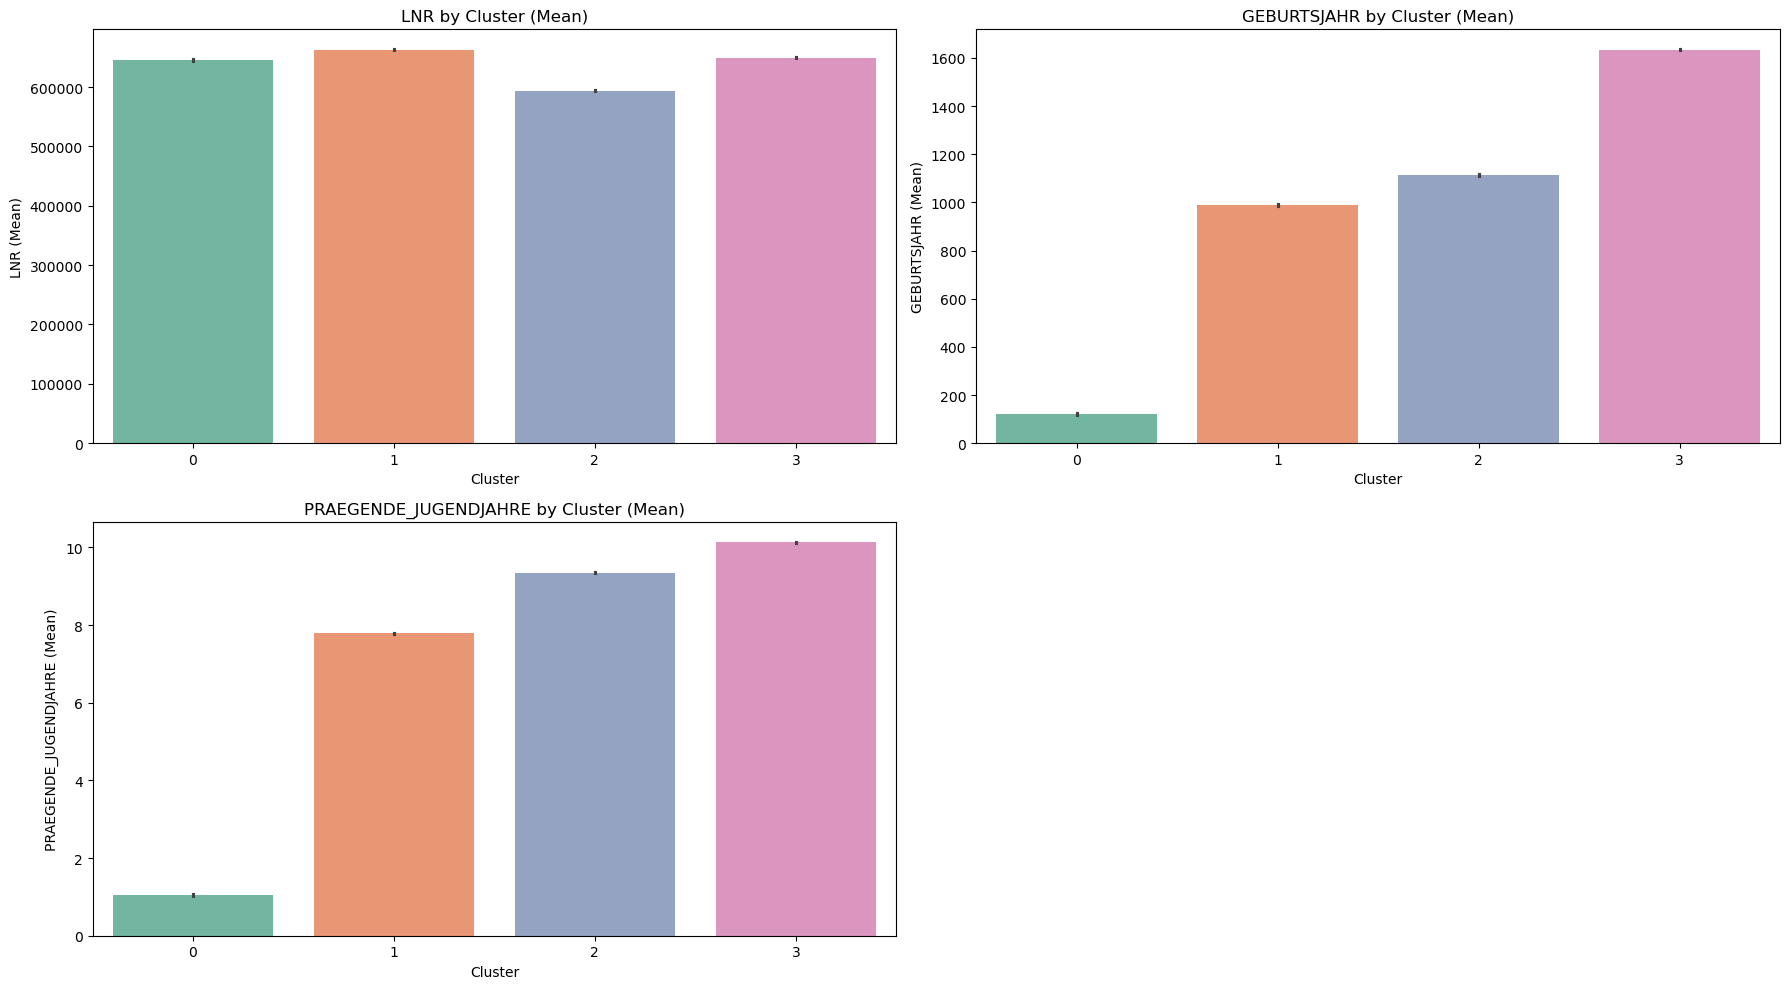

In [16]:
# Plotting Bar Chart for top normal numerical features by cluster
plot_cluster_features(df_top_features_normal_cols, "normal", cleaned_df)

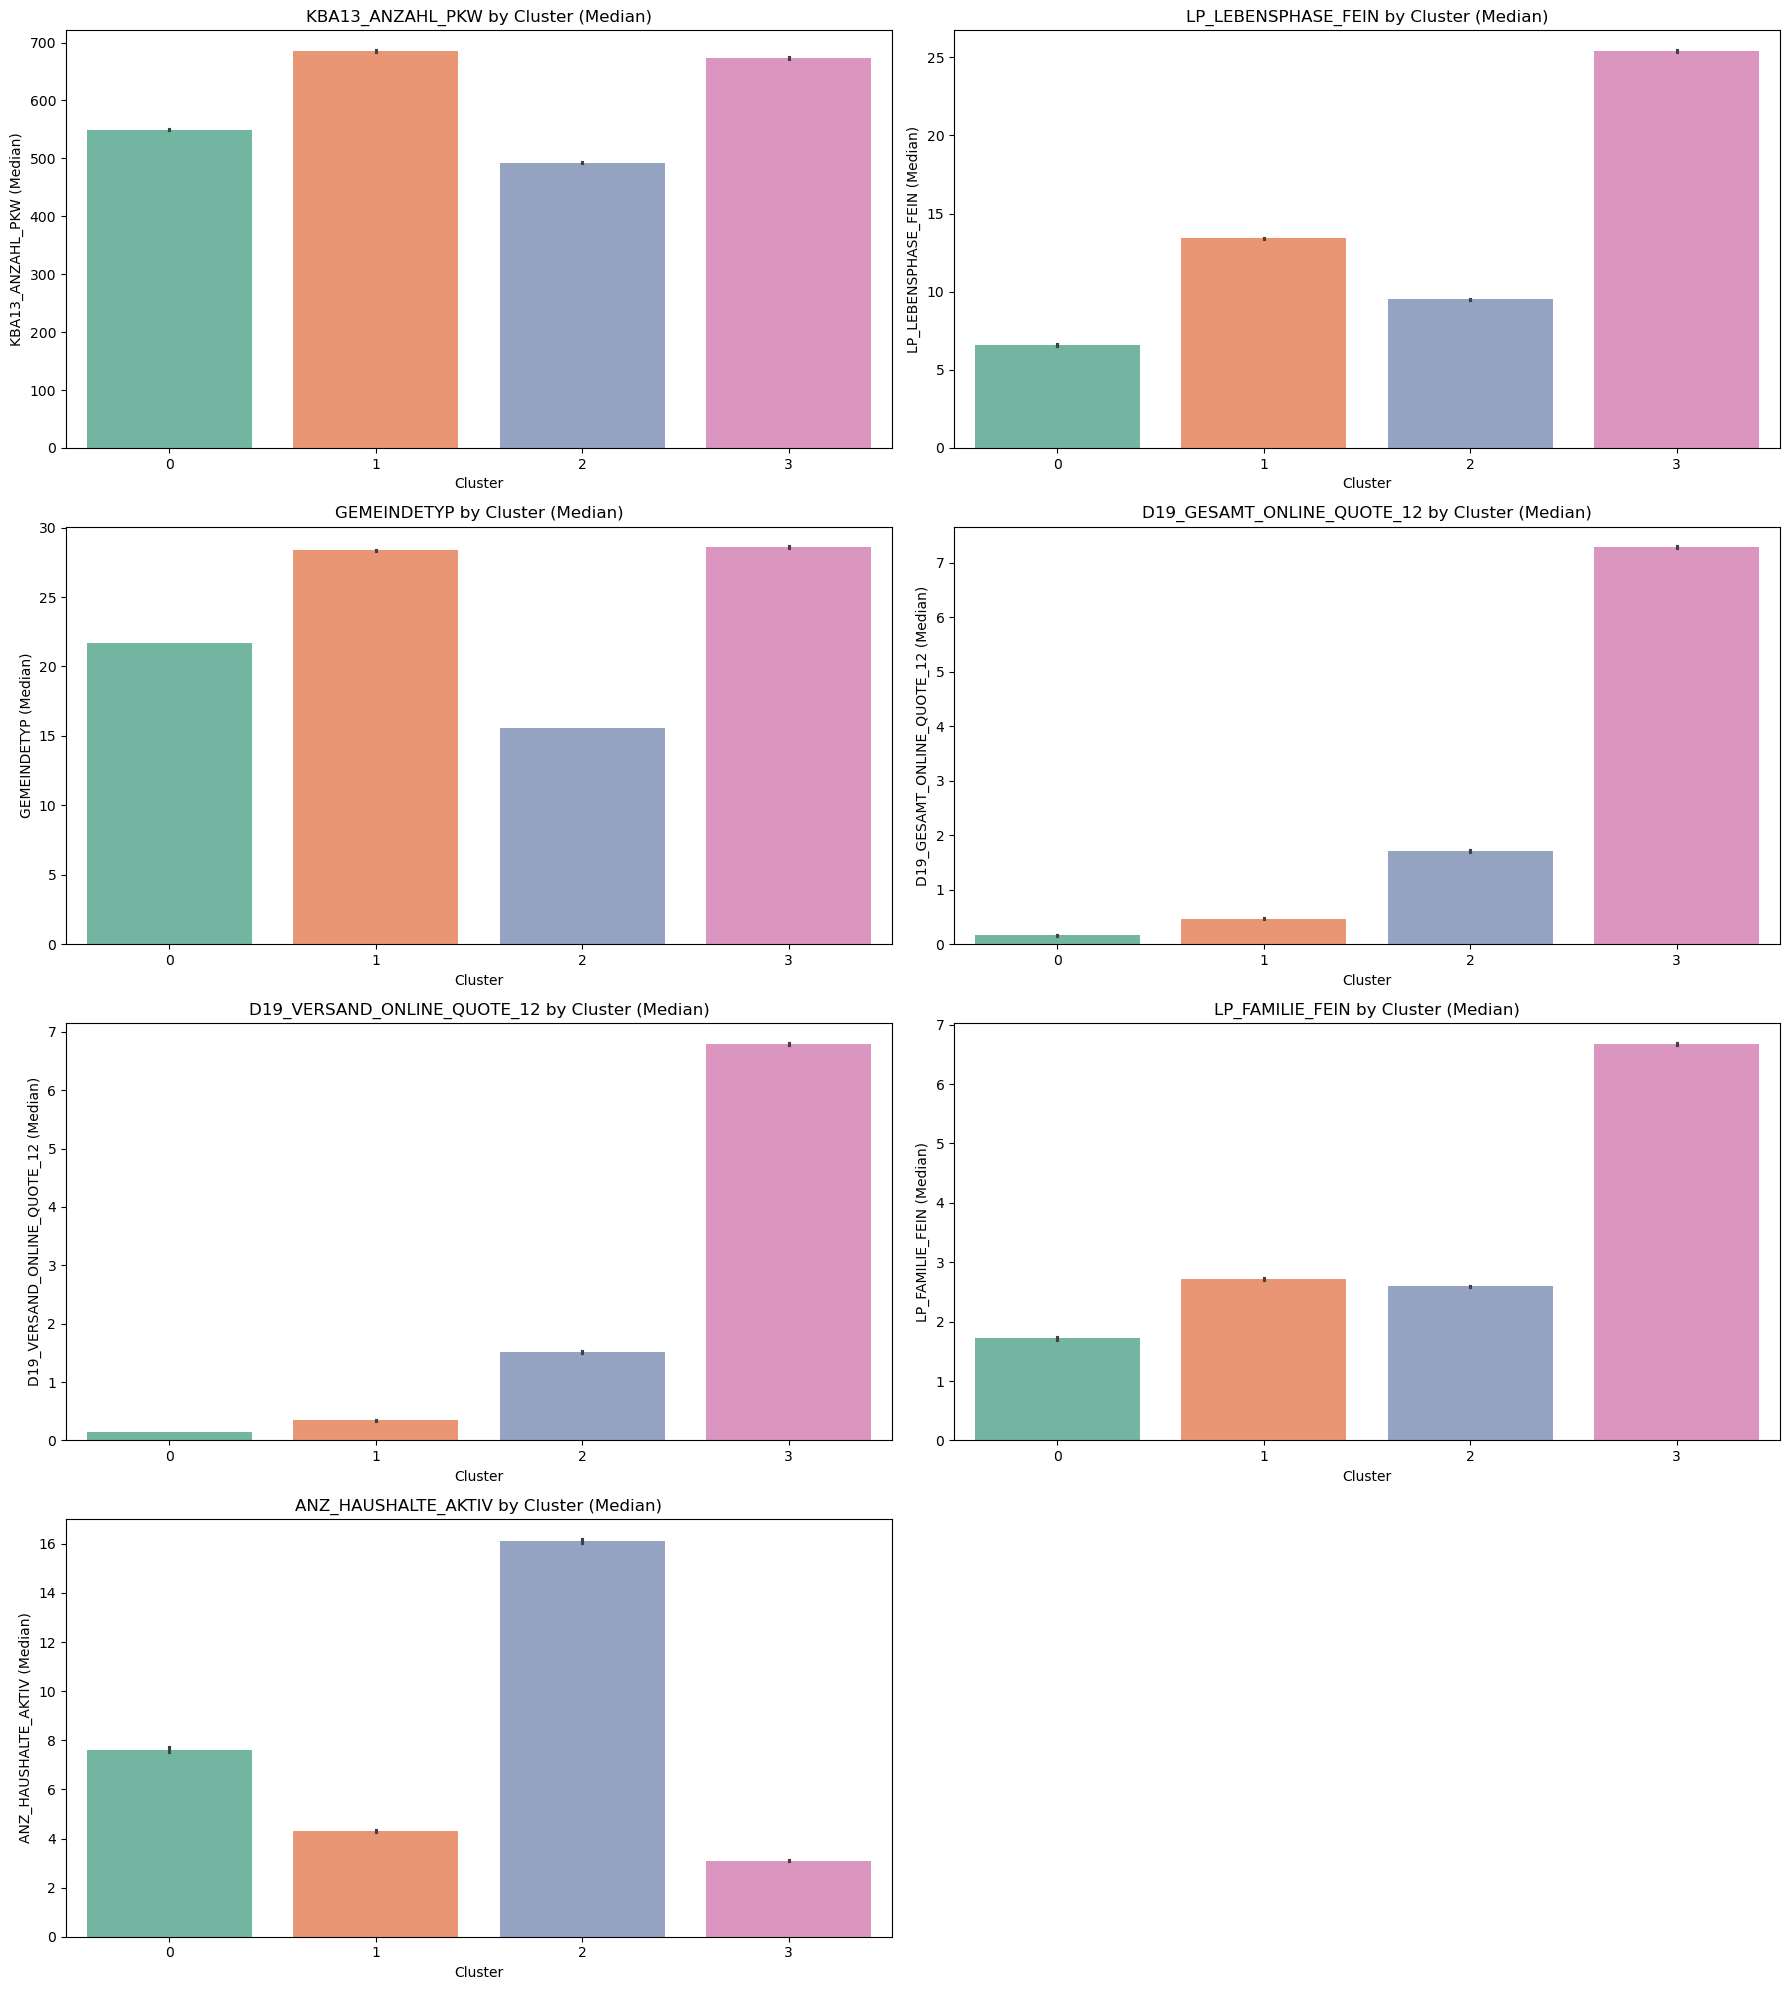

In [17]:
# Plotting Bar Chart for top skewed numerical features by cluster
plot_cluster_features(df_top_features_skewed_cols, "skewed", cleaned_df)

In [18]:
#Function to plot Heatmap for top Numerical Features
def create_feature_importance_heatmap(df, cluster_column='Cluster', top_features=None):
    """
    Creates a heatmap to visualize the relative importance of numerical features across clusters.

    Parameters:
        df (pd.DataFrame): A DataFrame containing the cluster column and numerical feature columns.
        cluster_column (str): The name of the column identifying clusters. Default is 'Cluster'.
        top_features (list, optional): A list of numerical feature names to include in the heatmap. 
                                       If None, all numerical features are used.

    Output:
        Displays a heatmap showing normalized feature importance across clusters.
    """
    df = df.copy()  # Avoid modifying the original DataFrame
    
    # Step 1: Aggregate numerical features by cluster
    numerical_features = top_features if top_features is not None else df.select_dtypes(include=['number']).columns
    cluster_means = df.groupby(cluster_column)[numerical_features].mean()

    # Step 2: Normalize the data for comparability
    cluster_means_normalized = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())

    # Step 3: Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cluster_means_normalized, cmap='coolwarm', annot=True, fmt=".2f")
    plt.title("Cluster-wise Feature Importance")
    plt.ylabel("Clusters")
    plt.xlabel("Features")
    plt.show()

Heatmap: Top 10 Features for df


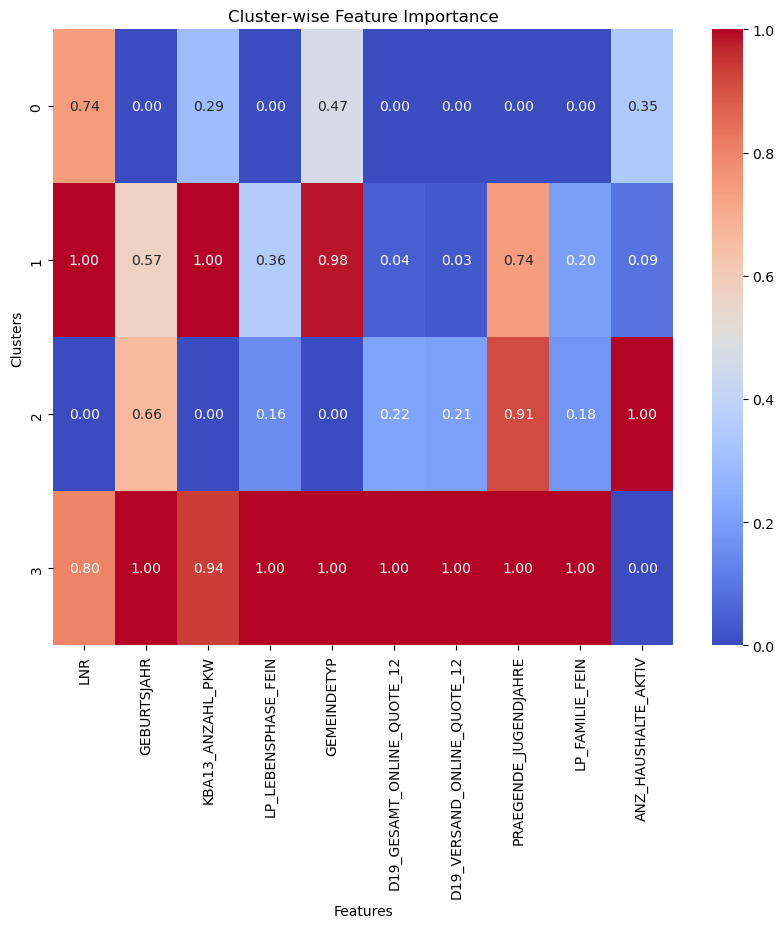

In [19]:
# Heatmap for top 10 features
print("Heatmap: Top 10 Features for df")
create_feature_importance_heatmap(cleaned_df, top_features=df_top_features)

## <a class="anchor" id="Interpretation_and_Visualization_of_Categorical_Features_df"><span style="color:#0d47a1">2.5 : Interpretation and Visualization of Categorical Features `(df)`</a></span>

#### 2.5.1. Categorical Feature Insights for df

In [20]:
# Summarize categorical features by finding the most frequent category in each cluster
df_categorical_features = cleaned_df.select_dtypes(include='object').columns
df_categorical_summary_dict = {}

for col in df_categorical_features:
    df_categorical_summary_dict[col] = cleaned_df.groupby('Cluster')[col].agg(lambda x: x.mode()[0])

df_categorical_summary = pd.DataFrame(df_categorical_summary_dict)
print("Categorical Summary by Cluster for df:")
df_categorical_summary

Categorical Summary by Cluster for df:


,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_INTL_2015,D19_LETZTER_KAUF_BRANCHE,EINGEFUEGT_AM,OST_WEST_KZ
Cluster,,,,,,
0,6B,8,51,D19_UNBEKANNT,1992.0,W
1,6B,4,24,D19_UNBEKANNT,1992.0,W
2,8A,8,51,D19_UNBEKANNT,1992.0,W
3,6B,4,24,D19_VERSICHERUNGEN,1992.0,W


In [21]:
def summarize_categorical_features(df, categorical_columns, cluster_column='Cluster'):
    """
    Summarize the most frequent category for each cluster in categorical columns.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        categorical_columns (list): List of categorical columns to summarize.
        cluster_column (str): The column representing clusters.

    Returns:
        pd.DataFrame: A DataFrame summarizing the most frequent category for each cluster.
    """

    df = df.copy()  # Avoid modifying the original DataFrame
    
    categorical_summary = {}
    for col in categorical_columns:
        categorical_summary[col] = df.groupby(cluster_column)[col].agg(lambda x: x.mode()[0])
    return pd.DataFrame(categorical_summary)

In [22]:
#Printing Categorical columns Summary by Cluster 
df_categorical_summary = summarize_categorical_features(cleaned_df, df_categorical_features)
print("Categorical Summary by Cluster for df:")
print(df_categorical_summary)

Categorical Summary by Cluster for df:
        CAMEO_DEU_2015 CAMEO_DEUG_2015 CAMEO_INTL_2015  \
Cluster                                                  
0                   6B               8              51   
1                   6B               4              24   
2                   8A               8              51   
3                   6B               4              24   

        D19_LETZTER_KAUF_BRANCHE EINGEFUEGT_AM OST_WEST_KZ  
Cluster                                                     
0                  D19_UNBEKANNT        1992.0           W  
1                  D19_UNBEKANNT        1992.0           W  
2                  D19_UNBEKANNT        1992.0           W  
3             D19_VERSICHERUNGEN        1992.0           W  


#### 2.5.2 Visualize Categorical Features for df

In [23]:
def plot_categorical_features_with_mode(df, categorical_columns, cluster_column='Cluster', title_suffix="Most Frequent Values"):
    """
    Plot the distribution of categorical features by cluster, with annotations for the most frequent value (mode).

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        categorical_columns (list): List of categorical columns to plot.
        cluster_column (str): The column representing clusters.
        title_suffix (str): Text to append to the title for clarification.
    
    Output:
        Displays bar plots showing the distribution of categorical features across clusters, 
        with annotations indicating the most frequent category in each cluster.

    """
    df = df.copy()  # Avoid modifying the original DataFrame
    
    for col in categorical_columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=cluster_column, hue=col, palette='Set2')
        plt.title(f'Distribution of {col} by {cluster_column} ({title_suffix})')
        plt.xlabel(cluster_column)
        plt.ylabel('Count')
        
        # Calculate and annotate the mode for each cluster
        modes = df.groupby(cluster_column)[col].agg(lambda x: x.mode()[0])
        #modes = df.groupby(cluster_column)[col].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else "None")
        
        for cluster, mode_value in modes.items():
            cluster_count = df[(df[cluster_column] == cluster) & (df[col] == mode_value)].shape[0]
            plt.text(
                cluster, cluster_count + 2,  # Position above the bar
                f"{mode_value} ({cluster_count})", 
                ha='center', color='black', fontsize=10
            )

        plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

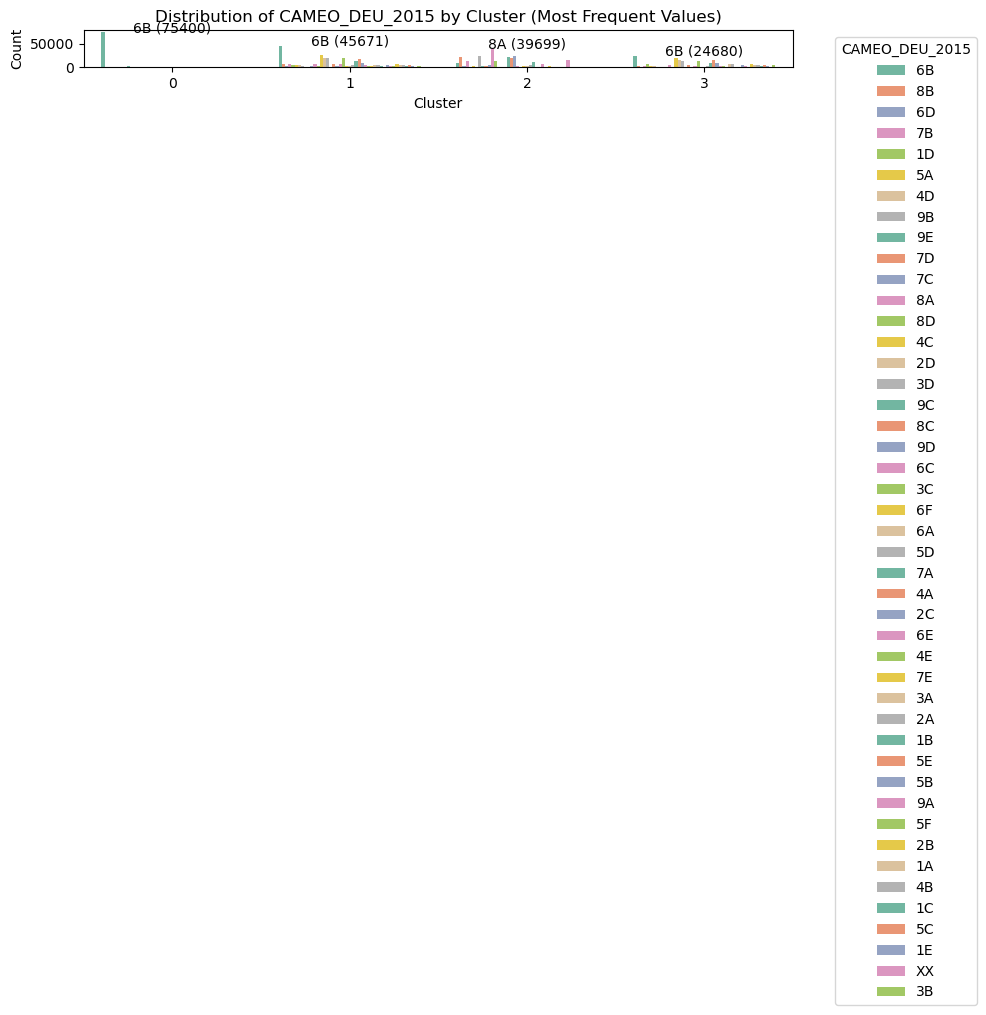

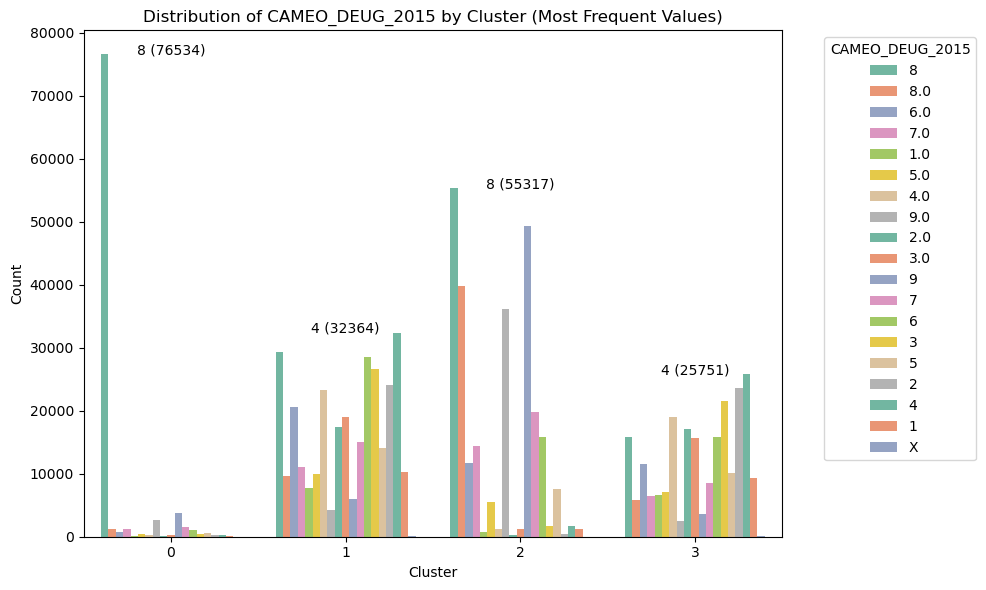

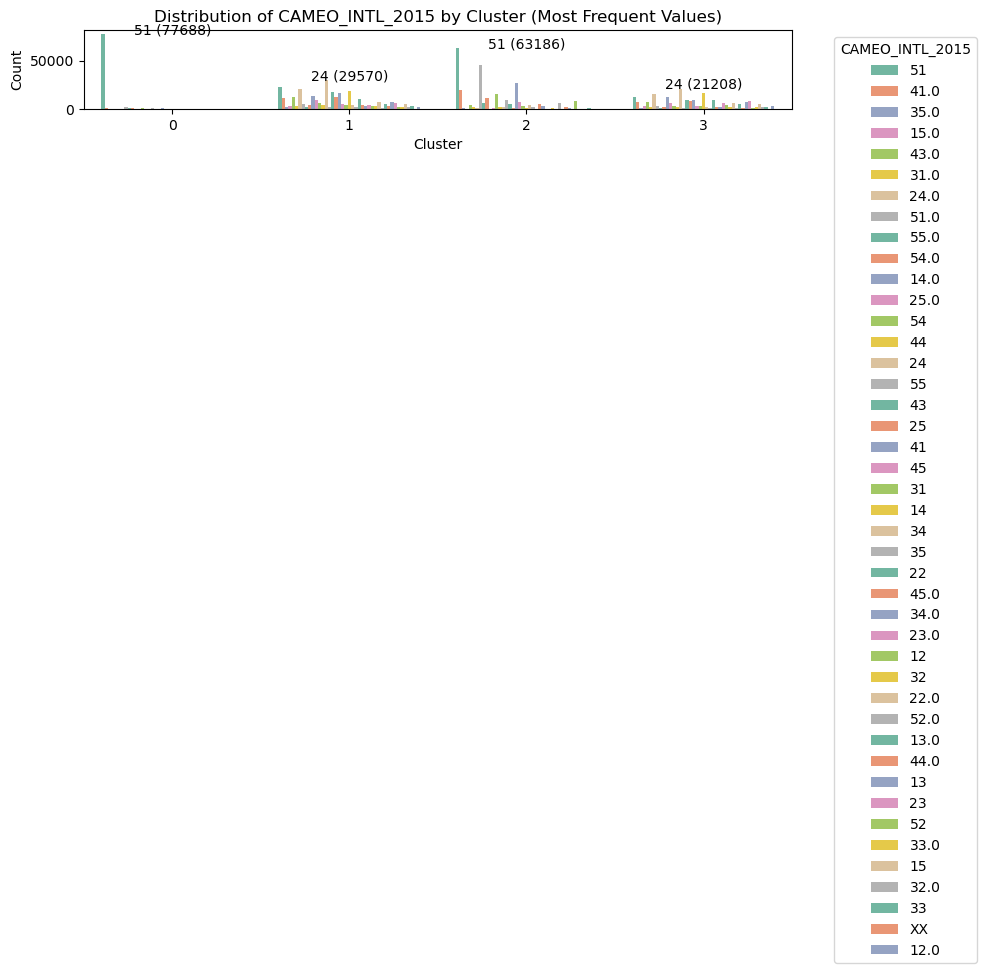

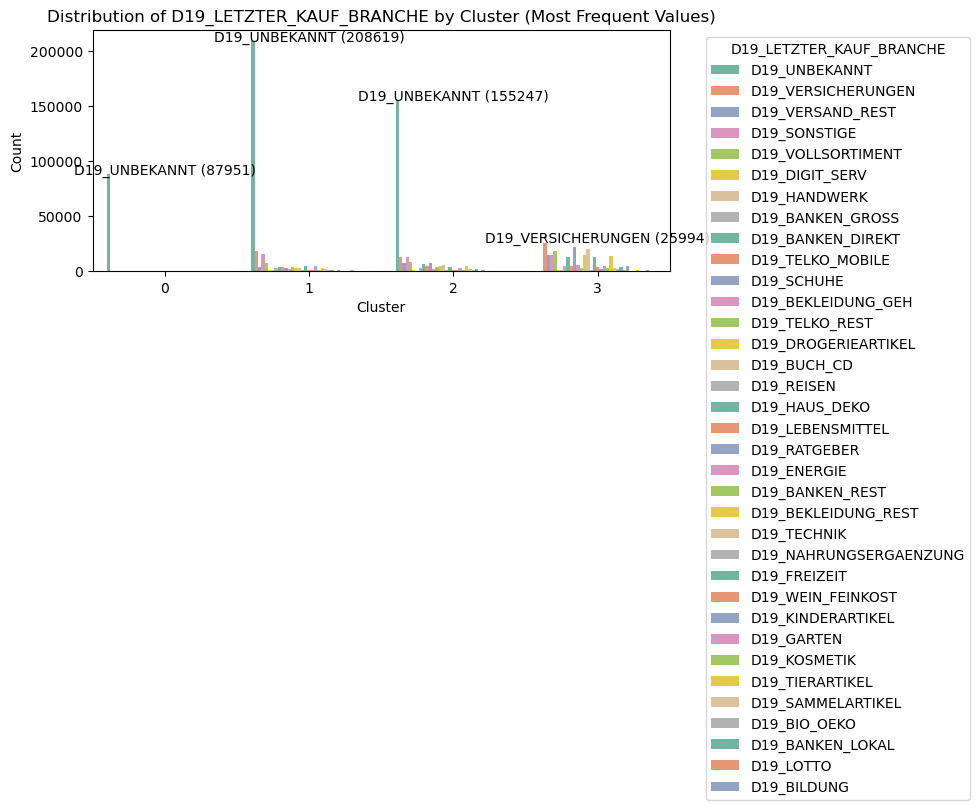

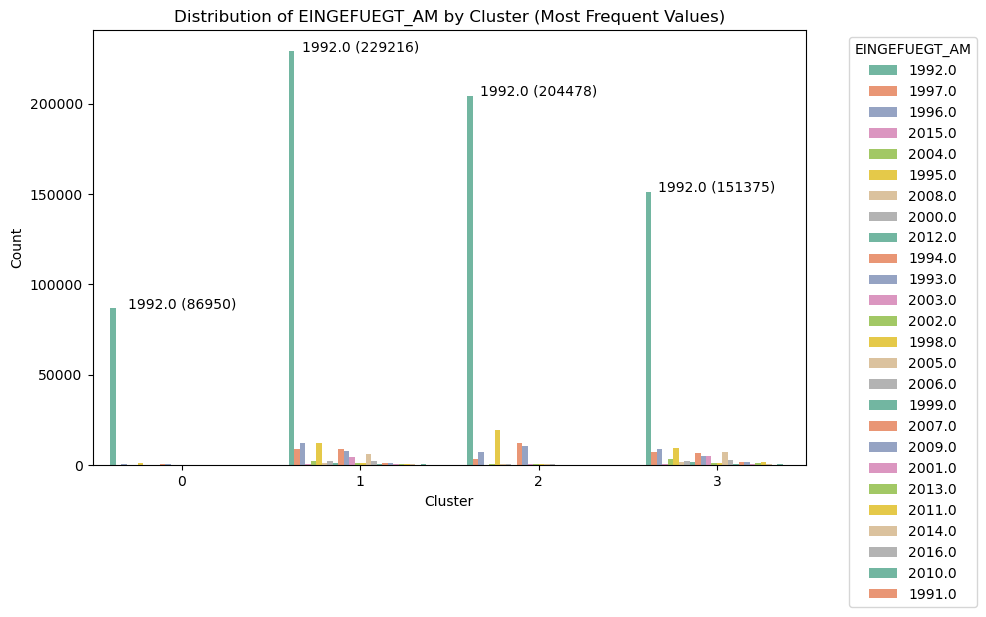

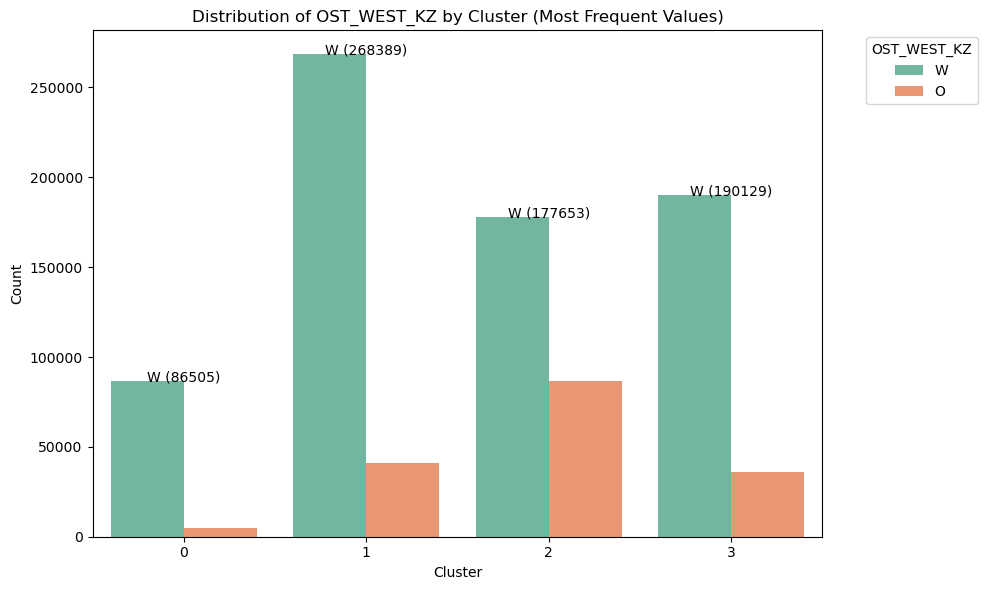

In [24]:
# Plotting the distribution of categorical features across clusters with annotations for the most frequent category in each cluster
plot_categorical_features_with_mode(cleaned_df, df_categorical_features, title_suffix="Most Frequent Values")

In [25]:
#Function to plot Heatmap for Categorical features
def create_categorical_heatmap(df, categorical_columns, cluster_column='Cluster'):
    """
    Create a heatmap for categorical feature distributions across clusters.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the clustered data.
        categorical_columns (list): List of categorical columns to summarize.
        cluster_column (str): The column representing clusters.

    Output:
        A heatmap displaying the proportion of the most frequent category 
        for each categorical feature across different clusters.
    """
    df = df.copy()  # Avoid modifying the original DataFrame
    
    categorical_summary = {}
    for col in categorical_columns:
        # Calculate the proportion of the most frequent category in each cluster
        categorical_summary[col] = df.groupby(cluster_column)[col].agg(
            lambda x: x.value_counts(normalize=True).max()
        )
    summary_df = pd.DataFrame(categorical_summary)

    # Create the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        summary_df,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        cbar_kws={'label': 'Proportion of Most Frequent Category'}
    )
    plt.title("Categorical Feature Distribution Across Clusters")
    plt.xlabel("Features")
    plt.ylabel("Clusters")
    plt.tight_layout()
    plt.show()

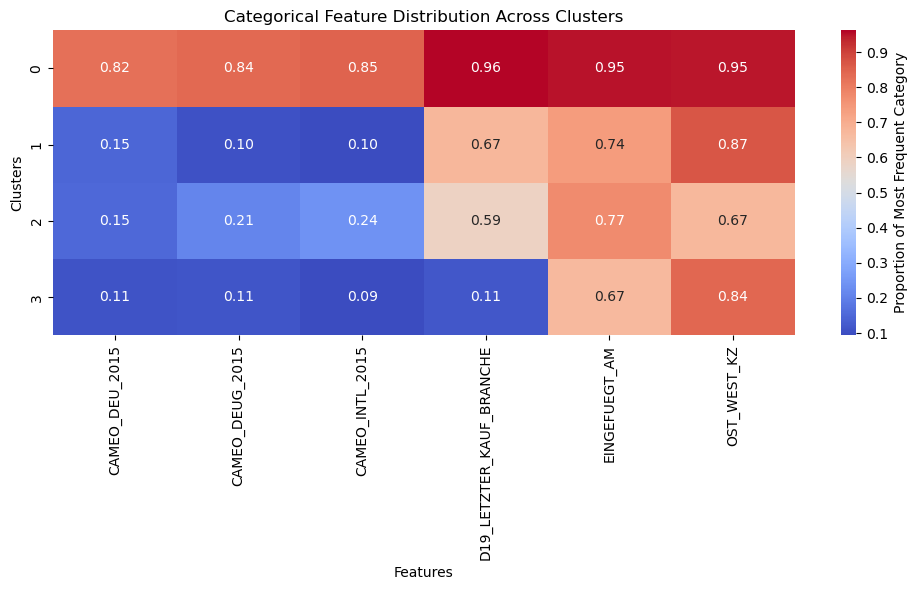

In [26]:
# Visualize with a Heatmap for df
create_categorical_heatmap(cleaned_df, df_categorical_features)

## <a class="anchor" id="Cluster_Characteristics_Summary_and_PCA_Components_Interpretation_df"><span style="color:#0d47a1">2.6 : Cluster Characteristics Summary and PCA Components Interpretation `(df)`</a></span>

#### 2.6.1. Cluster Characteristics Summary

In [27]:
# Printing Cluster Characteristics Summary
for cluster in range(4):
    print(f"\nCluster {cluster} Summary:")
    print(f"Size: {df_cluster_sizes[cluster]}")
    print("Key Numerical Features:")
    print(df_numerical_summary.loc[cluster])
    print("\nKey Categorical Features:")
    print(df_categorical_summary.loc[cluster])


Cluster 0 Summary:
Size: 91437
Key Numerical Features:
LNR_mean                 6.452793e+05
LNR_median               6.537340e+05
LNR_var                  6.556943e+10
LNR_std                  2.560653e+05
AKT_DAT_KL_mean          4.840888e+00
                             ...     
VHA_var                  9.595264e-02
VHA_std                  3.097622e-01
WOHNDAUER_2008_median    9.000000e+00
WOHNDAUER_2008_var       9.683480e-01
WOHNDAUER_2008_std       9.840467e-01
Name: 0, Length: 1265, dtype: float64

Key Categorical Features:
CAMEO_DEU_2015                         6B
CAMEO_DEUG_2015                         8
CAMEO_INTL_2015                        51
D19_LETZTER_KAUF_BRANCHE    D19_UNBEKANNT
EINGEFUEGT_AM                      1992.0
OST_WEST_KZ                             W
Name: 0, dtype: object

Cluster 1 Summary:
Size: 309367
Key Numerical Features:
LNR_mean                 6.630572e+05
LNR_median               6.637480e+05
LNR_var                  6.043089e+10
LNR_std        

#### 2.6.2 PCA Components Interpretation

In [28]:
# Get the explained variance ratio for each PCA component
df_explained_variance = df_pca.explained_variance_ratio_

# Create a DataFrame for PCA components and original features
df_pca_components = pd.DataFrame(df_pca.components_, columns=preprocessed_df.columns)
df_top_pca_features = df_pca_components.abs().mean(axis=0).nlargest(10).index
print(f"Top features contributing to PCA: {df_top_pca_features}")

Top features contributing to PCA: Index(['remainder__EXTSEL992', 'remainder__KK_KUNDENTYP',
       'remainder__KBA13_KRSSEG_KLEIN', 'remainder__ANZ_KINDER',
       'remainder__RT_SCHNAEPPCHEN',
       'one_hot_encoder__D19_LETZTER_KAUF_BRANCHE_D19_BUCH_CD',
       'remainder__KBA05_ANTG2', 'one_hot_encoder__CAMEO_DEU_2015_9D',
       'remainder__ANZ_HH_TITEL', 'remainder__LNR'],
      dtype='object')


## <a class="anchor" id="Customer_Segmentation_Final_Report_for_General_Population_Data_df"><span style="color:#0d47a1">2.7 : Customer Segmentation Final Report for General Population Data`(df)`</a></span>

### 1. Objective:
This report presents the findings from the segmentation analysis of the `df` dataset, which contains demographic and lifestyle data representing the general population of Germany. The analysis employed unsupervised learning techniques to identify clusters of individuals with similar attributes, providing actionable insights for targeted marketing.

---

### 2. Dataset Overview:
The `df` dataset underwent extensive preprocessing, including:
- Scaling and imputing missing values.
- Application of PCA to reduce dimensions while preserving 95% of the variance.

- **Post-PCA Data Shape:** The reduced dataset contained over 890,000 records with significantly fewer features, enhancing computational efficiency and interpretability.

---

### 3. Methodology and Key Steps:

#### 3.1. Dimensionality Reduction:
PCA was used to retain essential information and eliminate redundancy in the dataset. This step ensured efficient clustering of the data.

#### 3.2. Optimal Clustering:
The optimal number of clusters was determined using the Elbow Method, where the Within-Cluster Sum of Squares (WCSS) was plotted against the number of clusters. The "elbow" observed at **4 clusters** indicated the most suitable balance between complexity and interpretability.

#### 3.3. KMeans Clustering:
Using KMeans with 4 clusters, individuals were grouped into distinct segments that share common demographic and lifestyle characteristics.

---

### 4. Findings from Clustering Analysis:
The general population was categorized into **4 key clusters**, described below:

- **Cluster 0:**
  - **Size:** Largest group.
  - **Demographics:** Dominated by middle-aged individuals.
  - **Key Features:** Strong inclination towards stability in residence duration.

- **Cluster 1:**
  - **Size:** Medium-sized segment.
  - **Demographics:** Younger demographic, active in urban settings.
  - **Distinct Traits:** Interest in modern, technology-driven products.

- **Cluster 2:**
  - **Size:** Smaller cluster.
  - **Key Behaviors:** Strong alignment with traditional values.
  - **Key Insights:** Higher representation in rural or suburban areas.

- **Cluster 3:**
  - **Size:** Smallest cluster.
  - **Behavior:** High diversity in purchasing preferences, from luxury to budget-conscious items.

---

### 5. Business Implications:
The segmentation insights from the general population can support business strategies as follows:
- **Personalized Outreach:** Design marketing campaigns tailored to the needs and preferences of each cluster.
- **Enhanced Customer Acquisition:** Focus resources on clusters more likely to convert into loyal customers.
- **Market Penetration:** Develop region-specific strategies for clusters predominantly residing in particular geographic areas.

---

### 6. Limitations and Recommendations:
- **Data Imputation:** Mean imputation for missing values may oversimplify the dataset and overlook subtle trends.
- **Clustering Assumptions:** The use of Euclidean distance in KMeans may not capture complex, non-linear relationships in the data.
- **Further Exploration:** Incorporate additional clustering techniques, such as hierarchical clustering or DBSCAN, to validate and refine these results.

---

This segmentation provides a foundational understanding of Germany's general population and guides subsequent analyses, including predictive modeling.

# <a class="anchor" id="Customer_Segmentation_Report_for_CUSTOMER_Data_df_customers"><span style="color:#0d47a1; font-weight:bold">Part 3 : Customer Segmentation Report for Customer Data `(df_customers)`</a></span>

## <a class="anchor" id="Data_Cleaning_df_customers"><span style="color:#0d47a1">3.1 : Data Cleaning`(df_customers)`</a></span>

In [29]:
# Numeric columns with NaN values
df_customers_numeric_cols = df_customers.select_dtypes(include=[float, int]).columns

#Categorical columns
df_customers_cat_cols = df_customers.select_dtypes(include=['object']).columns

In [30]:
#Data Cleaning
cleaned_df_customers = clean_dataframes(df_customers)

#Data Preprocessing
preprocessed_df_customers = preprocess_dataframe(cleaned_df_customers)

In [31]:
# Feature Scaling
df_customers_sc = StandardScaler()
preprocessed_df_customers_scaled = df_customers_sc.fit_transform(preprocessed_df_customers)

## <a class="anchor" id="PCA_df_customers"><span style="color:#0d47a1">3.2 : PCA`(df_customers)`</a></span>

In [32]:
# Apply PCA to the preprocessed data
df_customers_pca = PCA(n_components=0.95)  # Retain 95% variance
df_customers_pca_data = df_customers_pca.fit_transform(preprocessed_df_customers_scaled)

print(f"Customer Data(df_customers) Reduced data shape: {df_customers_pca_data.shape}")

Customer Data(df_customers) Reduced data shape: (191652, 328)


## <a class="anchor" id="KMeans_Clustering_df_customers"><span style="color:#0d47a1">3.3 : KMeans Clustering `(df_customers)`</a></span>

#### 3.3.1 Deciding K value by elbow method

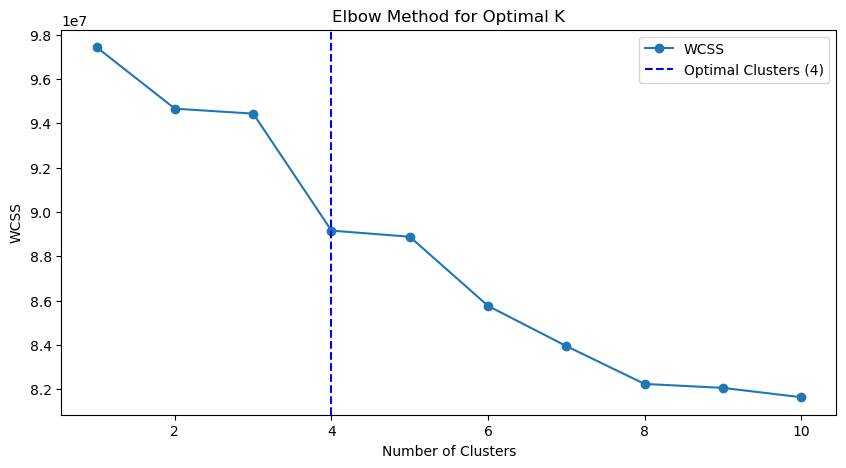

In [33]:
wcss_inertia = []
for k in range(1, 11):
    df_customers_kmeans = KMeans(n_clusters=k, random_state=42)
    df_customers_kmeans.fit(df_customers_pca_data)
    wcss_inertia.append(df_customers_kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss_inertia, marker='o', label='WCSS')
plt.axvline(x=4, color='blue', linestyle='--', label='Optimal Clusters (4)')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.legend()
plt.show()

#### Elbow Method Analysis for df_customers

The Elbow Method was used to determine the optimal number of clusters by plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters. 

From the plot:
- A significant drop in WCSS is observed as the number of clusters increases from 1 to 4.
- Beyond 4 clusters, the rate of decrease in WCSS slows significantly, forming an "elbow" at 4.

This indicates that 4 clusters provide a good balance between minimizing WCSS and avoiding excessive complexity. Using 4 clusters allows us to derive meaningful customer segments while maintaining interpretability, which is critical for designing targeted marketing strategies.

#### 3.3.2 : KMeans Clustering for df_customers

In [34]:
# Apply K-Means with chosen number of clusters (4)
df_customers_kmeans = KMeans(n_clusters=4, random_state=42)
df_customers_clusters = df_customers_kmeans.fit_predict(df_customers_pca_data)

#Creating additional column "Cluster" to identify the perictular cluster number related to datapoint
df_customers['Cluster'] = df_customers_clusters
cleaned_df_customers['Cluster'] = df_customers_clusters

## <a class="anchor" id="Interpretation_and_Visualization_of_Top_Numerical_Features_df_customers"><span style="color:#0d47a1">3.4 : Interpretation and Visualization of Top Numerical Features `(df_customers)`</a></span>

#### 3.4.1. Cluster Sizes

In [35]:
# Size of each cluster
df_customers_cluster_sizes = df_customers['Cluster'].value_counts()
print(df_customers_cluster_sizes)

Cluster
3    143350
0     47203
1       933
2       166
Name: count, dtype: int64


#### 3.4.2. Numerical Feature Insights

In [36]:
# Calculate skewness for all numerical columns
skewness = cleaned_df_customers[df_customers_numeric_cols].skew()

# Categorize columns based on skewness
df_customers_normal_cols = skewness[abs(skewness) < 0.5].index.tolist()
df_customers_skewed_cols = skewness[abs(skewness) >= 0.5].index.tolist()

print(f"Number of Normal Columns: {len(df_customers_normal_cols)}")
print(f"Number of Skewed Columns: {len(df_customers_skewed_cols)}")

Number of Normal Columns: 171
Number of Skewed Columns: 190


In [37]:
# Combine all statistics for normal numerical columns
df_customers_normal_summary = cleaned_df_customers.groupby('Cluster')[df_customers_normal_cols].agg(['mean', 'median', 'var', 'std'])

# Combine all statistics for skewed columns
df_customers_skewed_summary = cleaned_df_customers.groupby('Cluster')[df_customers_skewed_cols].agg(['median', 'var', 'std'])

# Flatten column names for easier readability
df_customers_normal_summary.columns = ['_'.join(col) for col in df_customers_normal_summary.columns]
df_customers_skewed_summary.columns = ['_'.join(col) for col in df_customers_skewed_summary.columns]

# Combine summaries
df_customers_numerical_summary = pd.concat([df_customers_normal_summary, df_customers_skewed_summary], axis=1)

# Display the updated summary
df_customers_numerical_summary

,LNR_mean,LNR_median,LNR_var,LNR_std,AGER_TYP_mean,AGER_TYP_median,AGER_TYP_var,AGER_TYP_std,ALTER_HH_mean,ALTER_HH_median,...,WOHNLAGE_std,ONLINE_PURCHASE_median,ONLINE_PURCHASE_var,ONLINE_PURCHASE_std,ANREDE_KZ_median,ANREDE_KZ_var,ANREDE_KZ_std,ALTERSKATEGORIE_GROB_median,ALTERSKATEGORIE_GROB_var,ALTERSKATEGORIE_GROB_std
Cluster,,,,,,,,,,,,,,,,,,,,,
0,95488.648179,95455.0,3.054749e+09,55269.787601,-0.993962,-1.0,0.018713,0.136795,11.270707,11.352009,...,0.186288,0.0,0.088570,0.297607,2.0,0.249645,0.499644,2.0,0.641744,0.801089
1,94354.226152,92423.0,3.136435e+09,56003.887807,0.614148,1.0,1.975422,1.405497,7.042872,7.000000,...,1.783216,0.0,0.047889,0.218835,2.0,0.243713,0.493673,4.0,0.644773,0.802977
2,98681.301205,98077.0,2.835312e+09,53247.649475,0.271084,-1.0,2.320007,1.523157,11.018072,13.000000,...,2.590600,0.0,0.167397,0.409142,1.0,0.226835,0.476272,3.0,0.638627,0.799142
3,95944.026013,95977.0,3.062670e+09,55341.391839,0.783376,1.0,1.784667,1.335914,11.407213,11.000000,...,2.076465,0.0,0.080045,0.282922,1.0,0.220485,0.469558,4.0,0.569152,0.754422


#### 3.4.3. Visualize Top Numerical Features

In [38]:
# Mean for normal columns
df_customers_normal_summary_mean = cleaned_df_customers.groupby('Cluster')[df_customers_normal_cols].mean()

# Median for skewed columns
df_customers_skewed_summary_median = cleaned_df_customers.groupby('Cluster')[df_customers_skewed_cols].median()

# Combine summaries
df_customers_numerical_summary_mean_median = pd.concat([df_customers_normal_summary_mean, df_customers_skewed_summary_median], axis=1)
df_customers_numerical_summary_mean_median

# Calculate variance for all numerical columns
df_customers_numerical_variance = df_customers_numerical_summary_mean_median.var()
df_customers_top_features = df_customers_numerical_variance.nlargest(10).index
df_customers_top_features

Index(['LNR', 'GEBURTSJAHR', 'KBA13_ANZAHL_PKW', 'MIN_GEBAEUDEJAHR',
       'ANZ_STATISTISCHE_HAUSHALTE', 'ANZ_HAUSHALTE_AKTIV',
       'EINGEZOGENAM_HH_JAHR', 'LP_LEBENSPHASE_FEIN', 'KBA05_SEG6',
       'KBA05_ANHANG'],
      dtype='object')

In [39]:
df_customers_top_features_normal_cols = []
df_customers_top_features_skewed_cols = []

for col in df_customers_top_features:
    if col in df_customers_normal_cols:
        df_customers_top_features_normal_cols.append(col)
    elif col in df_customers_skewed_cols:
        df_customers_top_features_skewed_cols.append(col)
    else:
        print()
        
print("df_customers_top_features_normal_cols = ",df_customers_top_features_normal_cols)
print("df_customers_top_features_skewed_cols = ",df_customers_top_features_skewed_cols)

df_customers_top_features_normal_cols =  ['LNR', 'GEBURTSJAHR', 'LP_LEBENSPHASE_FEIN']
df_customers_top_features_skewed_cols =  ['KBA13_ANZAHL_PKW', 'MIN_GEBAEUDEJAHR', 'ANZ_STATISTISCHE_HAUSHALTE', 'ANZ_HAUSHALTE_AKTIV', 'EINGEZOGENAM_HH_JAHR', 'KBA05_SEG6', 'KBA05_ANHANG']


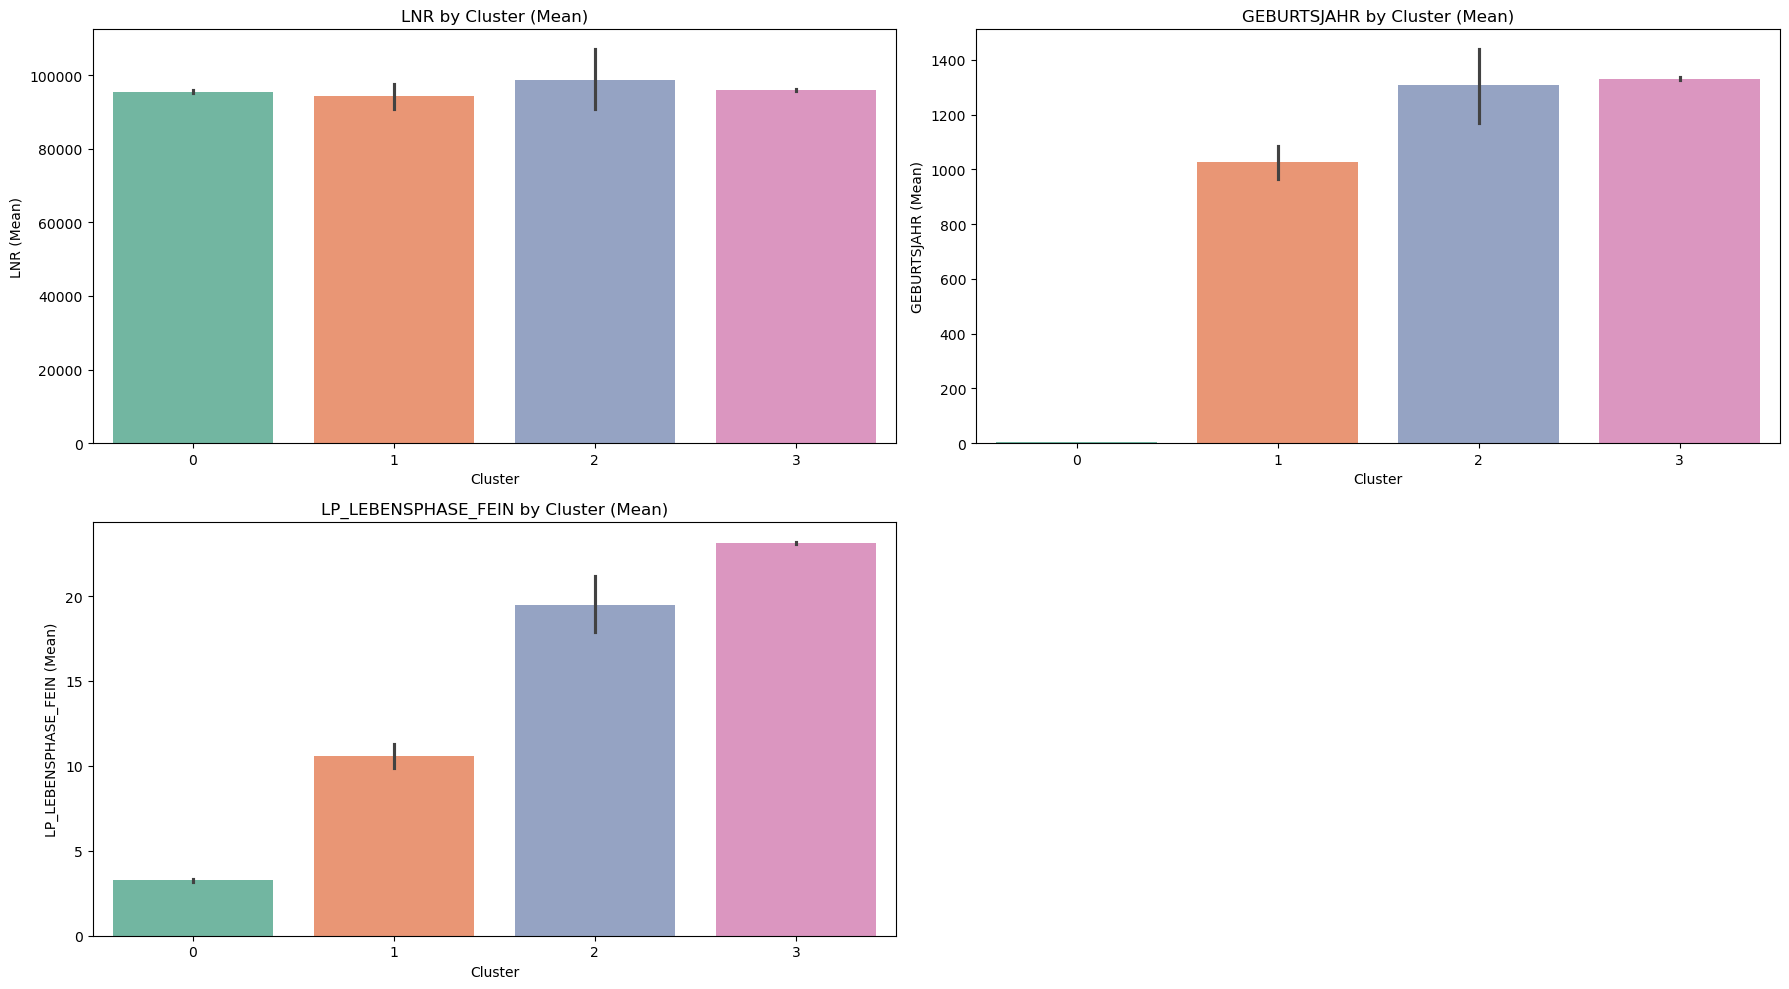

In [40]:
# Plotting Bar Chart for top normal numerical features by cluster
plot_cluster_features(df_customers_top_features_normal_cols, "normal", cleaned_df_customers)

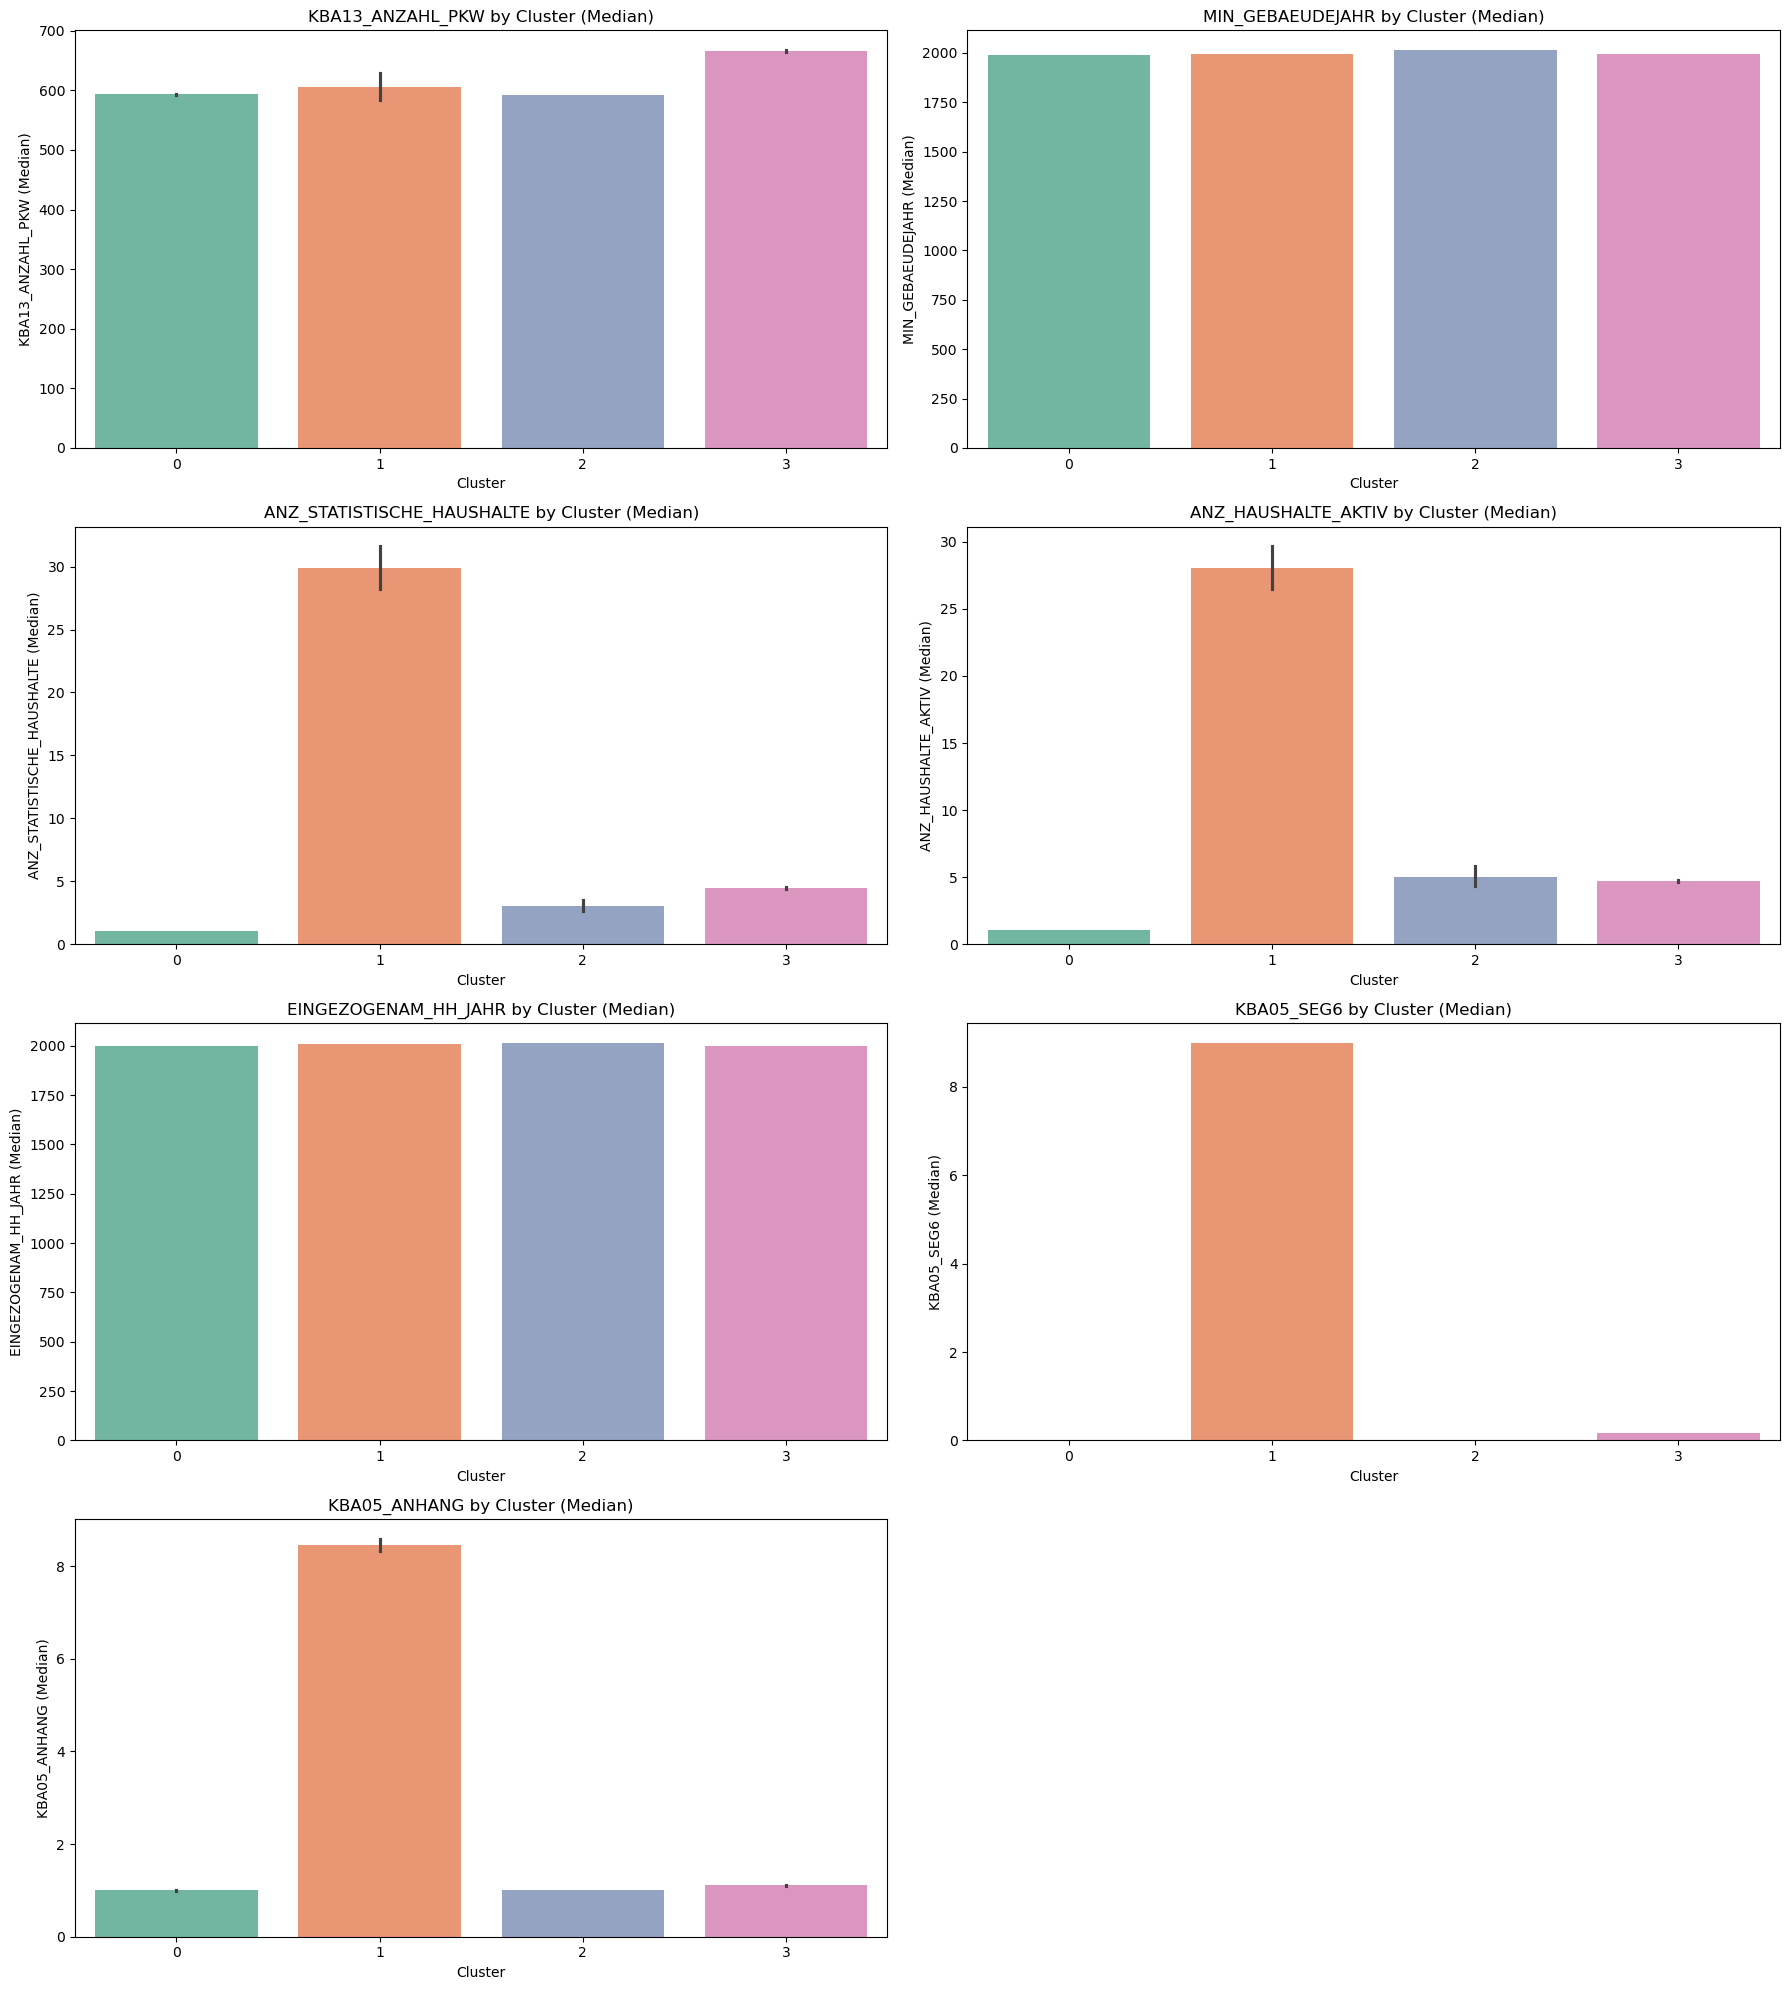

In [41]:
# Plotting Bar Chart for top skewed numerical features by cluster
plot_cluster_features(df_customers_top_features_skewed_cols, "skewed", cleaned_df_customers)

Heatmap: Top 10 Features


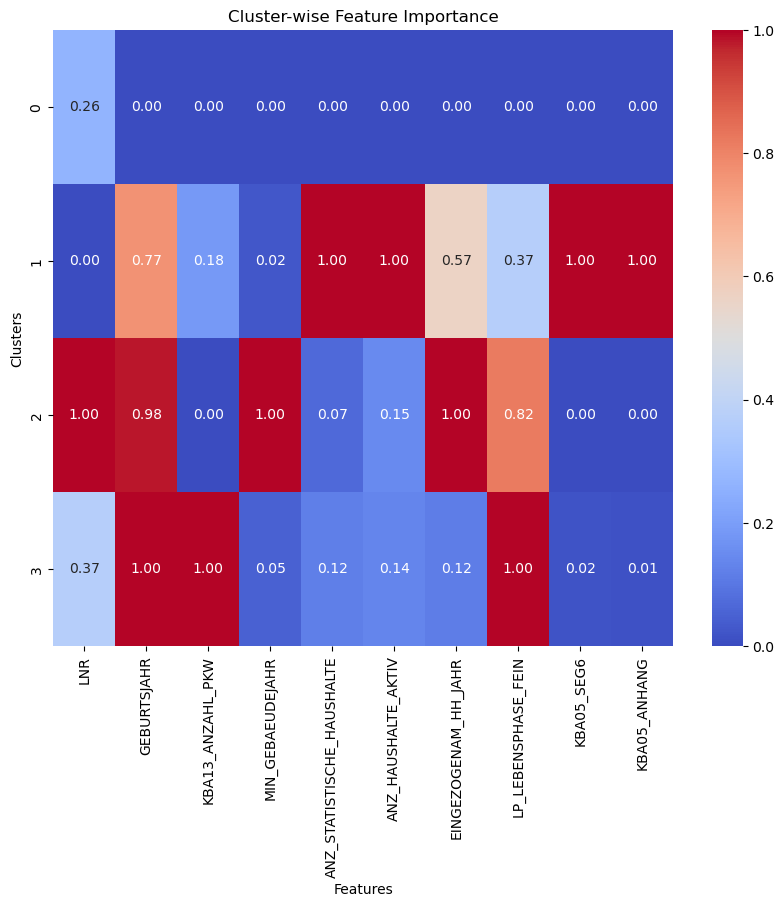

In [42]:
# Heatmap for top 10 features
print("Heatmap: Top 10 Features")
create_feature_importance_heatmap(cleaned_df_customers, top_features=df_customers_top_features)

## <a class="anchor" id="Interpretation_and_Visualization_of_Categorical_Features_df_customers"><span style="color:#0d47a1">3.5 : Interpretation and Visualization of Categorical Features `(df_customers)`</a></span>

#### 3.5.1. Categorical Feature Insights

In [43]:
# Summarize categorical features by finding the most frequent category in each cluster
df_customers_categorical_features = cleaned_df_customers.select_dtypes(include='object').columns
df_customers_categorical_summary_dict = {}

for col in df_customers_categorical_features:
    df_customers_categorical_summary_dict[col] = cleaned_df_customers.groupby('Cluster')[col].agg(lambda x: x.mode()[0])

df_customers_categorical_summary = pd.DataFrame(df_customers_categorical_summary_dict)
print("Categorical Summary by Cluster:")
df_customers_categorical_summary

Categorical Summary by Cluster:


,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_INTL_2015,D19_LETZTER_KAUF_BRANCHE,EINGEFUEGT_AM,OST_WEST_KZ,PRODUCT_GROUP,CUSTOMER_GROUP
Cluster,,,,,,,,
0,2D,2,14,D19_UNBEKANNT,1992.0,W,COSMETIC_AND_FOOD,MULTI_BUYER
1,9E,9,55,D19_UNBEKANNT,1992.0,W,COSMETIC_AND_FOOD,MULTI_BUYER
2,2D,2,14,D19_UNBEKANNT,2015.0,W,COSMETIC_AND_FOOD,MULTI_BUYER
3,2D,2,14,D19_UNBEKANNT,1992.0,W,COSMETIC_AND_FOOD,MULTI_BUYER


In [44]:
df_customers_categorical_summary = summarize_categorical_features(cleaned_df_customers, df_customers_categorical_features)
print("Categorical Summary by Cluster:")
print(df_customers_categorical_summary)

Categorical Summary by Cluster:
        CAMEO_DEU_2015 CAMEO_DEUG_2015 CAMEO_INTL_2015  \
Cluster                                                  
0                   2D               2              14   
1                   9E               9              55   
2                   2D               2              14   
3                   2D               2              14   

        D19_LETZTER_KAUF_BRANCHE EINGEFUEGT_AM OST_WEST_KZ      PRODUCT_GROUP  \
Cluster                                                                         
0                  D19_UNBEKANNT        1992.0           W  COSMETIC_AND_FOOD   
1                  D19_UNBEKANNT        1992.0           W  COSMETIC_AND_FOOD   
2                  D19_UNBEKANNT        2015.0           W  COSMETIC_AND_FOOD   
3                  D19_UNBEKANNT        1992.0           W  COSMETIC_AND_FOOD   

        CUSTOMER_GROUP  
Cluster                 
0          MULTI_BUYER  
1          MULTI_BUYER  
2          MULTI_BUYER  
3      

#### 3.5.2 Visualize Categorical Features
Plot the distribution of each categorical feature across clusters.

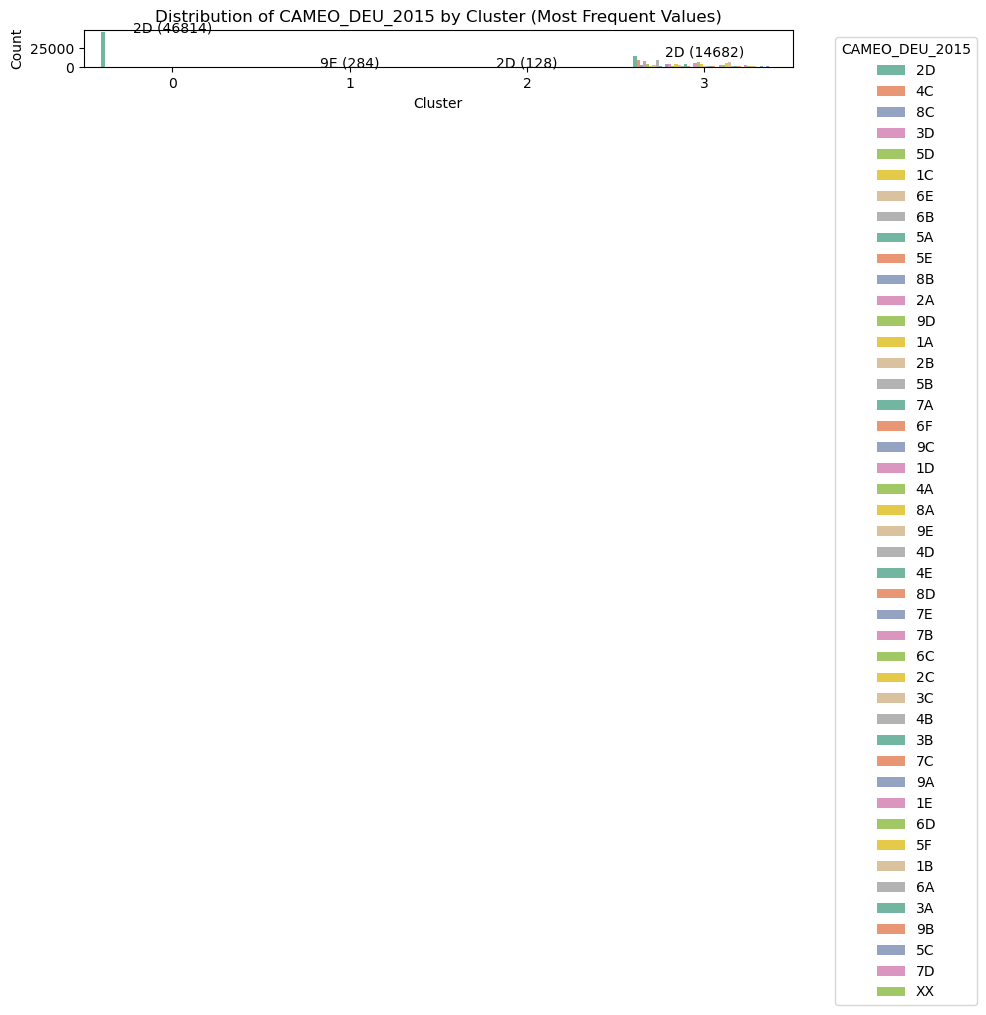

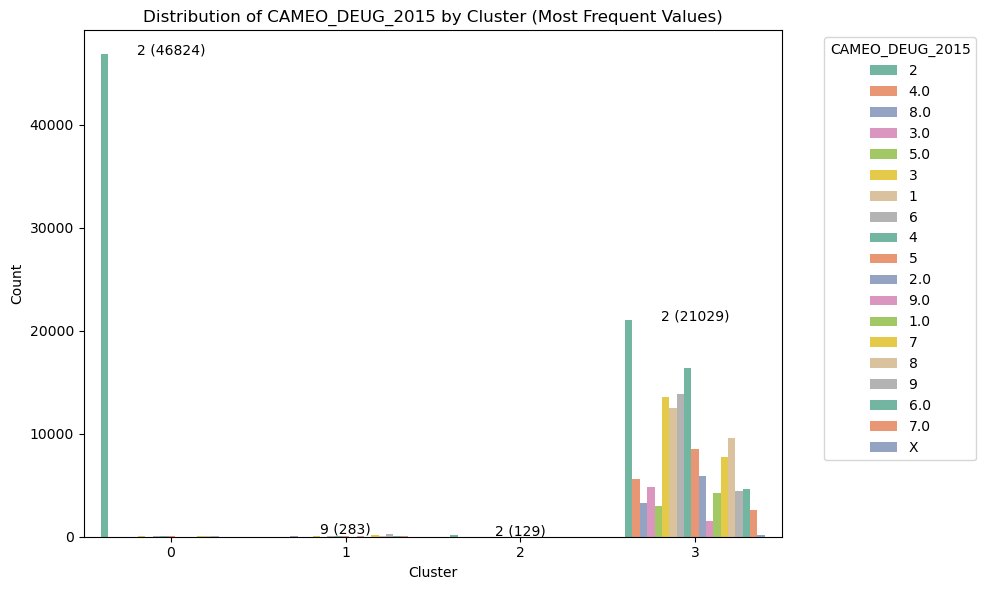

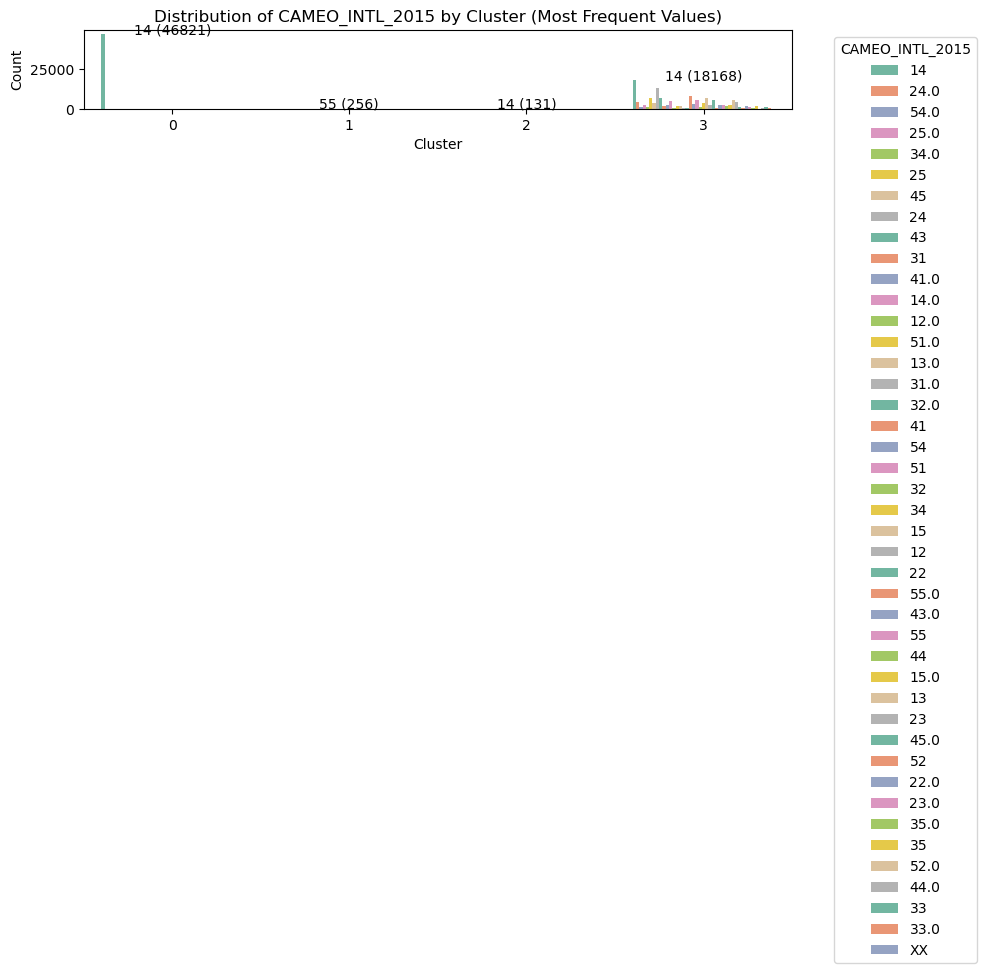

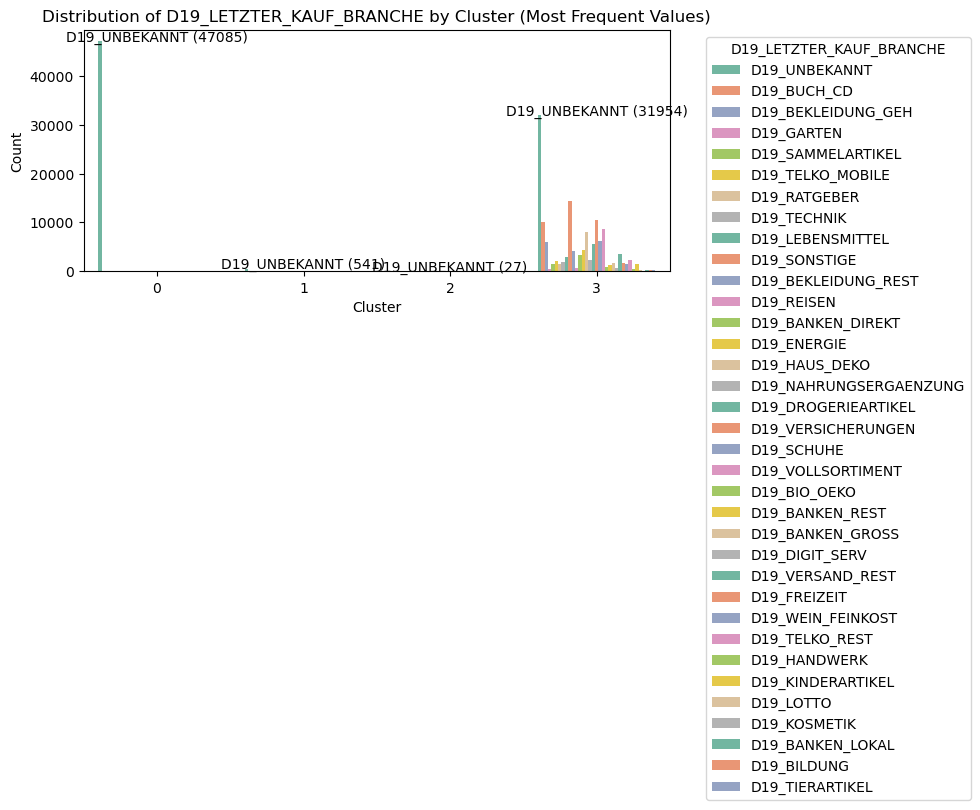

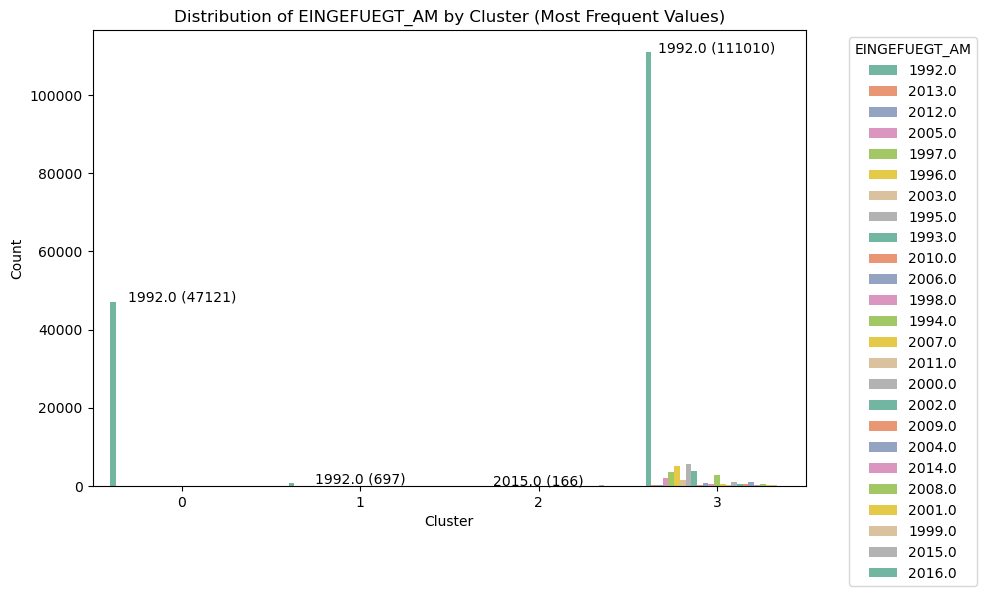

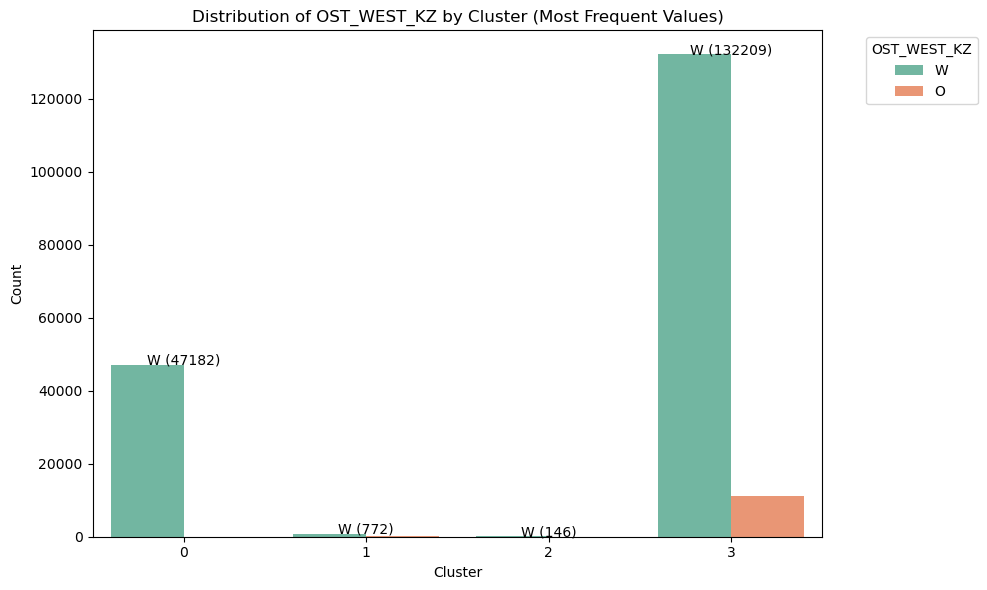

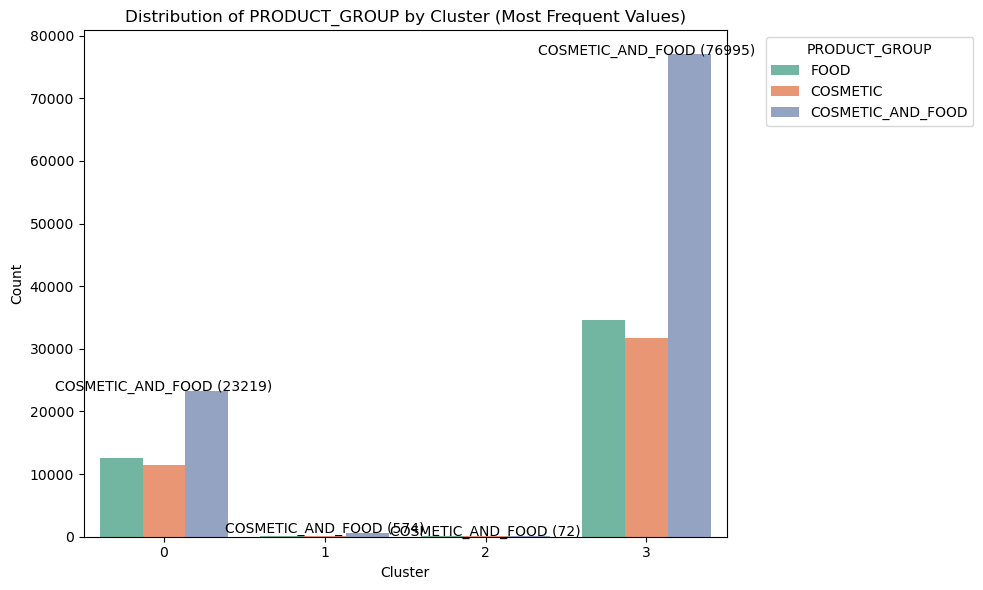

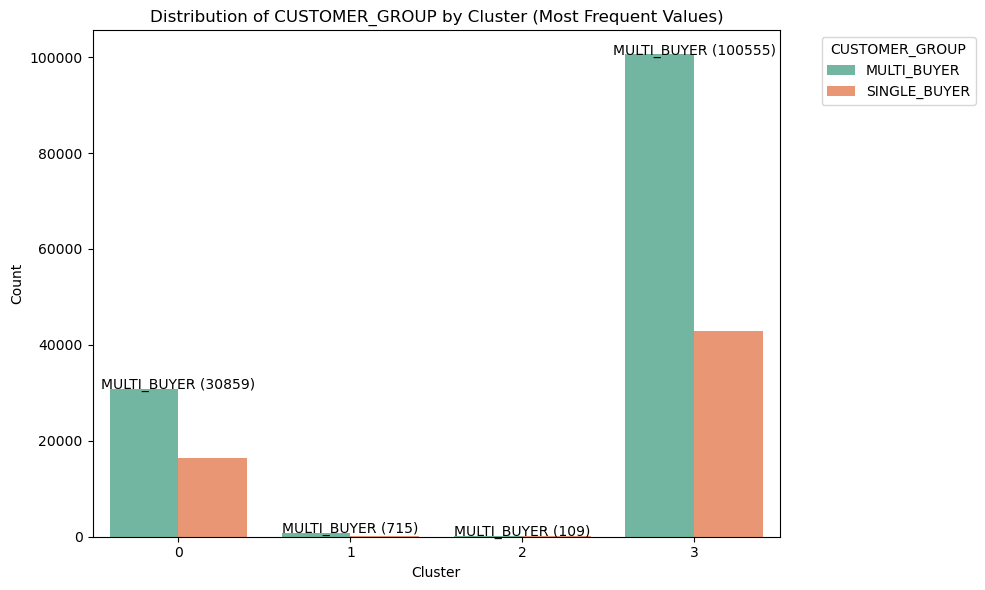

In [45]:
plot_categorical_features_with_mode(cleaned_df_customers, df_customers_categorical_features, title_suffix="Most Frequent Values")

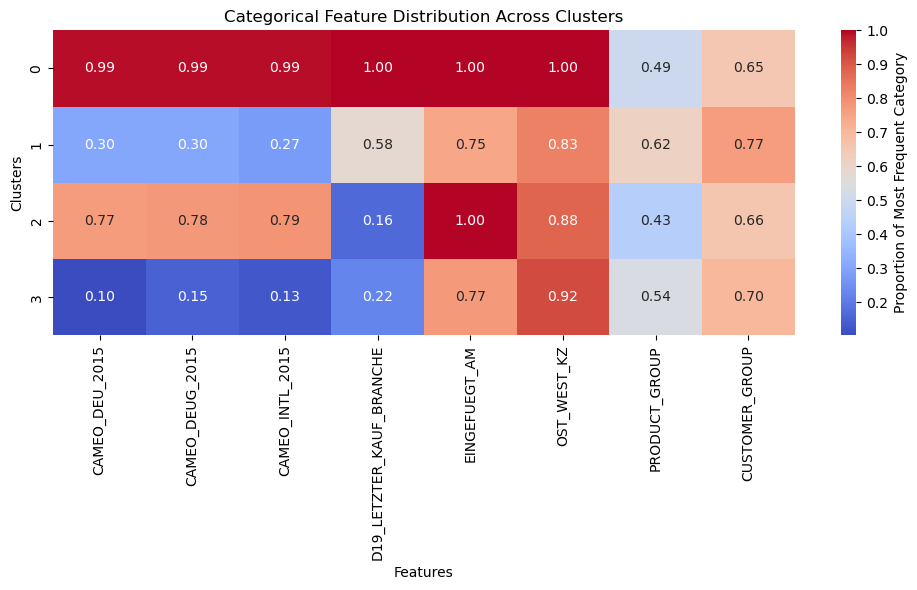

In [46]:
# Visualize with a Heatmap
create_categorical_heatmap(cleaned_df_customers, df_customers_categorical_features)

## <a class="anchor" id="Cluster_Characteristics_Summary_and_PCA_Components_Interpretation_df_customers"><span style="color:#0d47a1">3.6 : Cluster Characteristics Summary and PCA Components Interpretation `(df_customers)`</a></span>

#### 3.6.1. Cluster Characteristics Summary

In [47]:
# Printing Cluster Characteristics Summary
for cluster in range(4):
    print(f"\nCluster {cluster} Summary:")
    print(f"Size: {df_customers_cluster_sizes[cluster]}")
    print("Key Numerical Features:")
    print(df_customers_numerical_summary.loc[cluster])
    print("\nKey Categorical Features:")
    print(df_customers_categorical_summary.loc[cluster])


Cluster 0 Summary:
Size: 47203
Key Numerical Features:
LNR_mean                       9.548865e+04
LNR_median                     9.545500e+04
LNR_var                        3.054749e+09
LNR_std                        5.526979e+04
AGER_TYP_mean                 -9.939622e-01
                                   ...     
ANREDE_KZ_var                  2.496446e-01
ANREDE_KZ_std                  4.996444e-01
ALTERSKATEGORIE_GROB_median    2.000000e+00
ALTERSKATEGORIE_GROB_var       6.417438e-01
ALTERSKATEGORIE_GROB_std       8.010891e-01
Name: 0, Length: 1254, dtype: float64

Key Categorical Features:
CAMEO_DEU_2015                             2D
CAMEO_DEUG_2015                             2
CAMEO_INTL_2015                            14
D19_LETZTER_KAUF_BRANCHE        D19_UNBEKANNT
EINGEFUEGT_AM                          1992.0
OST_WEST_KZ                                 W
PRODUCT_GROUP               COSMETIC_AND_FOOD
CUSTOMER_GROUP                    MULTI_BUYER
Name: 0, dtype: object

Clu

#### 3.6.2. PCA Components Interpretation

In [48]:
# Get the explained variance ratio for each PCA component
df_customers_explained_variance = df_customers_pca.explained_variance_ratio_

# Create a DataFrame for PCA components and original features
df_customers_pca_components = pd.DataFrame(df_customers_pca.components_, columns=preprocessed_df_customers.columns)
df_customers_top_pca_features = df_customers_pca_components.abs().mean(axis=0).nlargest(10).index
print(f"Top features contributing to PCA: {df_customers_top_pca_features}")

Top features contributing to PCA: Index(['remainder__FINANZTYP', 'one_hot_encoder__CAMEO_DEU_2015_2C',
       'remainder__KBA13_KRSSEG_KLEIN', 'remainder__ANZ_KINDER',
       'remainder__RT_SCHNAEPPCHEN', 'remainder__KBA05_ANTG2',
       'remainder__VERDICHTUNGSRAUM', 'remainder__RETOURTYP_BK_S',
       'remainder__D19_SOZIALES', 'remainder__EXTSEL992'],
      dtype='object')


## <a class="anchor" id="Customer_Segmentation_Final_Report_for_Customer_Data_df_customers"><span style="color:#0d47a1">3.7 : Customer Segmentation Final Report for Customer Data `(df_customers)`</a></span>

### 1. Objective:
The aim of this report is to summarize the findings from the customer segmentation analysis performed on the `df_customers` dataset. This analysis utilized clustering methods to identify distinct customer groups, leveraging unsupervised learning techniques like Principal Component Analysis (PCA) and KMeans clustering.

---

### 2. Dataset Overview:
The `df_customers` dataset includes attributes representing demographic and behavioral data of existing customers. After preprocessing, the dataset was scaled, imputed for missing values, and subjected to dimensionality reduction.

- **Post-PCA Data Shape:** The reduced dataset contained 191,652 samples with 329 principal components, preserving 95% of the variance.

---

### 3. Methodology and Key Steps:

#### 3.1. Dimensionality Reduction:
PCA was applied to reduce data dimensionality while retaining key patterns. This step addressed multicollinearity and improved computational efficiency.

#### 3.2. Optimal Clustering:
The optimal number of clusters was determined using the elbow method, which plots within-cluster sum of squares (WCSS) for various values of k.

#### 3.3. KMeans Clustering:
The KMeans algorithm was employed to partition customers into distinct clusters. Each cluster represents a unique segment with shared characteristics.

---

### 4. Findings from Clustering Analysis:
The customer base was segmented into **4 primary clusters**, each described below:

- **Cluster 0:**
  - **Size:** Largest cluster.
  - **Demographics:** Predominantly older age groups.
  - **Key Features:** High variance in `LNR` and stability in `WOHNDAUER` (residence duration).

- **Cluster 1:**
  - **Size:** Moderate-sized segment.
  - **Demographics:** Diverse age distribution with higher income stability.
  - **Distinct Traits:** Consistently high representation of luxury buyers.

- **Cluster 2:**
  - **Size:** Medium-sized cluster.
  - **Key Behaviors:** Active in purchasing insurance products.
  - **Geographic Pattern:** Predominantly Western Germany (`OST_WEST_KZ` = 'W').

- **Cluster 3:**
  - **Size:** Smallest group.
  - **Behavior:** Limited purchase activity but notable for unique niche product interests.

**Key Categorical Insights Across Clusters:**
- Variables such as `CAMEO_DEU_2015` (socioeconomic classification) and `D19_LETZTER_KAUF_BRANCHE` (last purchase category) played a significant role in differentiating clusters.

---

### 5. Business Implications:
This segmentation provides actionable insights for marketing strategies:
- **Targeted Campaigns:** Design cluster-specific marketing strategies to cater to the unique preferences and purchasing behaviors.
- **Resource Allocation:** Allocate resources efficiently to high-value clusters, such as those with higher income stability and active purchasing patterns.
- **Customer Retention:** Use insights to enhance personalized experiences for the most loyal and lucrative customer segments.

---

### 6. Limitations and Recommendations:
- **Data Limitations:** Missing data imputation may oversimplify real-world customer behaviors, potentially affecting the clustering outcome.
- **Model Limitations:** KMeans' reliance on Euclidean distance may struggle with non-linear relationships. Exploring other clustering techniques like DBSCAN could yield additional insights.

---

This segmentation serves as a foundation for predictive modeling in subsequent phases, aiming to predict campaign responses and further optimize customer engagement.

# <a class="anchor" id="Supervised_Learning_Model_df_train"><span style="color:#0d47a1; font-weight:bold">Part 4 : Supervised Learning Model `(df_train)`</a></span>

## <a class="anchor" id="Exploratory-Data-Analysis"><span style="color:#0d47a1">4.1 : Exploratory Data Analysis</a><span>

In [49]:
print("df_train shape = ",df_train.shape)
df_train.head()

df_train shape =  (42962, 367)


,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,RESPONSE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,1763,2,1.0,8.0,NaN,NaN,NaN,NaN,8.0,15.0,...,5.0,2.0,1.0,6.0,9.0,3.0,3,0,2,4
1,1771,1,4.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,1.0,2.0,1.0,4.0,9.0,7.0,1,0,2,3
2,1776,1,1.0,9.0,NaN,NaN,NaN,NaN,7.0,0.0,...,6.0,4.0,2.0,NaN,9.0,2.0,3,0,1,4
3,1460,2,1.0,6.0,NaN,NaN,NaN,NaN,6.0,4.0,...,8.0,11.0,11.0,6.0,9.0,1.0,3,0,2,4
4,1783,2,1.0,9.0,NaN,NaN,NaN,NaN,9.0,53.0,...,2.0,2.0,1.0,6.0,9.0,3.0,3,0,1,3


In [50]:
# Filter rows with RESPONSE = 1 (positive responses)
df_train_positive = df_train[df_train['RESPONSE'] == 1]

# Filter rows with RESPONSE != 1 (negative responses)
df_train_negative = df_train[df_train['RESPONSE'] != 1]

# Verify the sizes
print(f"Positive responses: {df_train_positive.shape}")
print(f"Negative responses: {df_train_negative.shape}")

Positive responses: (532, 367)
Negative responses: (42430, 367)


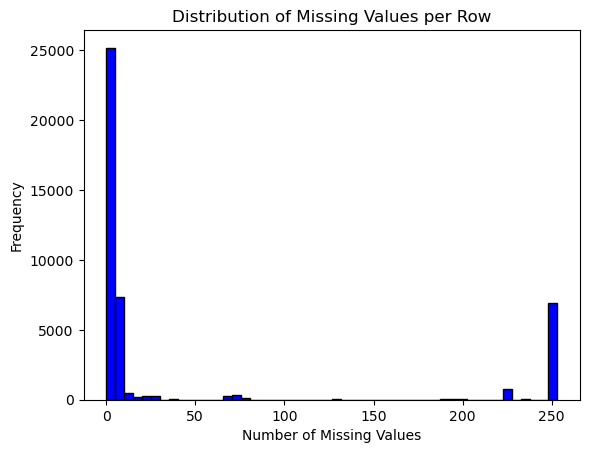

In [51]:
# Plot a histogram to visualize the distribution of missing values per row
plt.hist(df_train_negative.isnull().sum(axis=1), bins=50, color='blue', edgecolor='black')
plt.title("Distribution of Missing Values per Row")
plt.xlabel("Number of Missing Values")
plt.ylabel("Frequency")
plt.show()

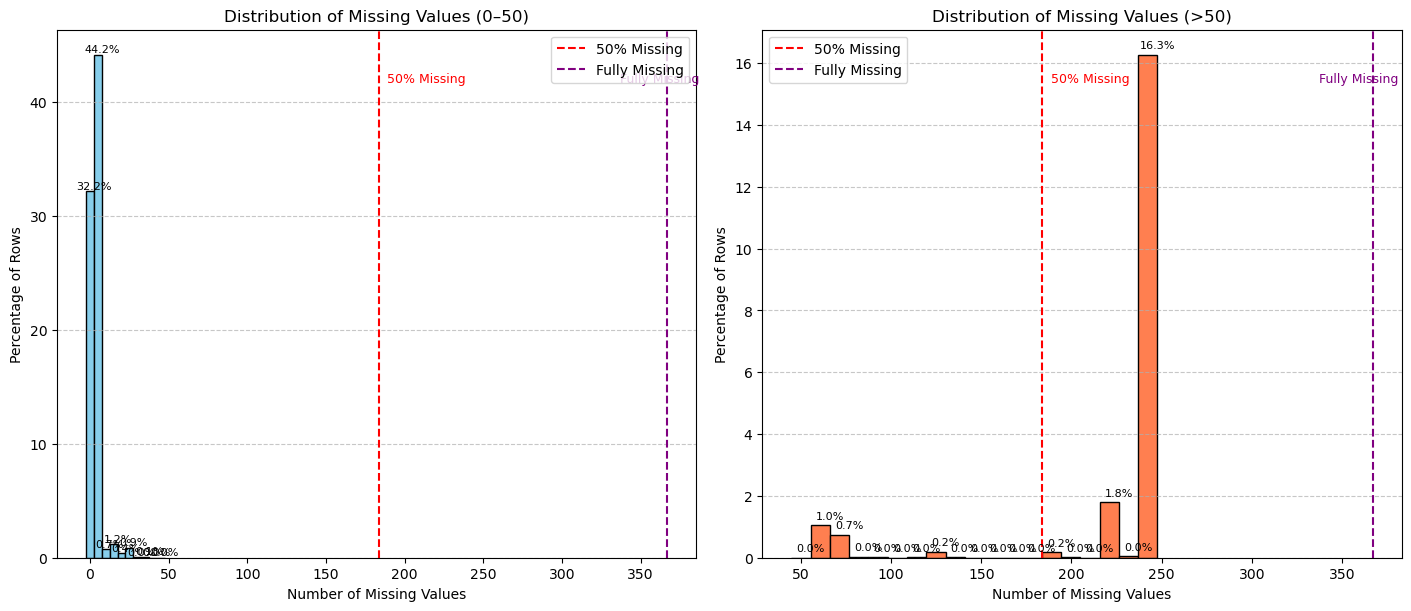

In [52]:
# Visualization of Missing Values Distribution
# This section analyzes the distribution of missing values across rows in the dataset.  
# - We first calculate the number of missing values per row.  
# - The data is split into two histograms:  
#   - One for rows with 0–50 missing values.  
#   - Another for rows with more than 50 missing values.  
# - The percentages of affected rows are calculated and displayed in bar charts.  
# - Important thresholds, such as 50% missing values, are highlighted for better interpretation.

# Calculate the number of missing values per row
missing_per_row = df_train_negative.isnull().sum(axis=1)

# Dynamic bin calculation for 0–50 range
bins_0_50 = np.arange(0, 55, 5)
bins_above_50 = np.linspace(50, missing_per_row.max(), 20)

# Histogram data
hist_0_50, bin_edges_0_50 = np.histogram(missing_per_row[missing_per_row <= 50], bins=bins_0_50)
hist_above_50, bin_edges_above_50 = np.histogram(missing_per_row[missing_per_row > 50], bins=bins_above_50)

# Convert to percentages
total_rows = len(missing_per_row)
percentages_0_50 = (hist_0_50 / total_rows) * 100
percentages_above_50 = (hist_above_50 / total_rows) * 100

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

# Plot for rows with 0–50 missing values
ax[0].bar(bin_edges_0_50[:-1], percentages_0_50, width=5, color='skyblue', edgecolor='black')
ax[0].set_title("Distribution of Missing Values (0–50)")
ax[0].set_xlabel("Number of Missing Values")
ax[0].set_ylabel("Percentage of Rows")
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# Annotate percentages
for i, pct in enumerate(percentages_0_50):
    ax[0].text(bin_edges_0_50[i] + 2.5, pct + 0.2, f"{pct:.1f}%", ha="center", fontsize=8)

# Plot for rows with >50 missing values
ax[1].bar(bin_edges_above_50[:-1], percentages_above_50, width=(bin_edges_above_50[1] - bin_edges_above_50[0]), color='coral', edgecolor='black')
ax[1].set_title("Distribution of Missing Values (>50)")
ax[1].set_xlabel("Number of Missing Values")
ax[1].set_ylabel("Percentage of Rows")
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

# Annotate percentages
for i, pct in enumerate(percentages_above_50):
    ax[1].text(bin_edges_above_50[i] + (bin_edges_above_50[1] - bin_edges_above_50[0]) / 2, pct + 0.2, f"{pct:.1f}%", ha="center", fontsize=8)

# Highlight thresholds and add labels
threshold_50 = df_train_negative.shape[1] * 0.5  # 50% missing values
threshold_full = df_train_negative.shape[1]  # Fully missing rows
for axis in ax:
    axis.axvline(threshold_50, color='red', linestyle='--', label="50% Missing")
    axis.axvline(threshold_full, color='purple', linestyle='--', label="Fully Missing")
    axis.legend()
    axis.text(threshold_50 + 5, axis.get_ylim()[1] * 0.9, "50% Missing", color='red', fontsize=9)
    axis.text(threshold_full - 30, axis.get_ylim()[1] * 0.9, "Fully Missing", color='purple', fontsize=9)

# Show plot
plt.show()

##### Insights Gained:
- Approximately **44.2%** of rows contain no missing values, as highlighted in the first plot.
- The second plot highlights that **16.3%** of rows are near the "fully missing" threshold, providing valuable insight for handling such cases during preprocessing.

In [53]:
# Determine the Maximum Missing Value Threshold Without Exceeding Rows
# This loop checks different missing value thresholds (from 10% to 100%) to find the highest level
# where no rows exceed the missing value limit. It helps in deciding a suitable threshold for data cleaning.
for threshold in np.arange(0.1, 1.1, 0.1): 
    missing_threshold = threshold * df_train_negative.shape[1]
    rows_exceeding_threshold = sum(df_train_negative.isnull().sum(axis=1) > missing_threshold)
    
    if rows_exceeding_threshold == 0:
        print(f"All rows have missing values well within the {threshold * 100:.1f}% range. No rows exceed this threshold.")
        break

All rows have missing values well within the 70.0% range. No rows exceed this threshold.


## <a class="anchor" id="Structure_and_Flow_Clustering_Rationale_and_Statistical_Methods"><span style="color:#0d47a1">4.2 Structure and Flow: Clustering Rationale and Statistical Methods `(df_train)`</a><span>

#### Detailed Explanation:
The project uses KMeans clustering to sample negative response rows and balance the dataset at a 1:4 positive-to-negative ratio.
**Why Clustering?**  
Clustering was used instead of simpler techniques like random undersampling to ensure that the sampled negative responses are representative of the entire negative class distribution, capturing its variability. Random undersampling may not preserve the diversity of the negative class, which is critical for training balanced models.

**Choice of KMeans**  
KMeans was selected as the clustering algorithm due to its efficiency and ability to handle large datasets with numerical features. It aligns well with the project’s requirements and provides a straightforward way to partition data into clusters, facilitating representative sampling. Other clustering algorithms, such as hierarchical clustering or DBSCAN, were not used as they are computationally intensive or less suited for large datasets with high dimensionality.

**Cluster Count**  
The number of clusters was chosen to match the desired count of negative samples (four times the positive count), ensuring proportional representation. For example, with 532 positive responses, 2128 clusters were created. This parameter directly impacts the dataset balance, as selecting too few clusters may result in underrepresentation, while too many clusters could dilute the diversity of the data.

**Feature Selection for Clustering**  
All numerical columns (excluding `RESPONSE`) were used for clustering to capture the comprehensive structure of the negative class data. Missing values were imputed with the mean to ensure that the clustering algorithm could process the data without errors. Mean imputation is a standard approach, particularly when the missing data is assumed to be random, as it preserves the overall distribution of the data.

**Limitations of Clustering**  
While clustering provides diverse samples, it comes with certain trade-offs:
- It assumes that the chosen features and distance metric (Euclidean distance) adequately represent the data's underlying structure.
- The imputation strategy (mean) may oversimplify the data, potentially masking more complex relationships.
- KMeans may struggle with data containing non-linear relationships or varying densities, which could affect the quality of the clusters.  

Despite these limitations, clustering remains a robust method for ensuring a balanced and representative dataset.

#### 4.2.1 K-Means Clustering for Negative Responses

In [54]:
# Recalculate the number of clusters to maintain 1:4 ratio
df_train_negative_cluster = df_train_negative
positive_count = df_train_positive.shape[0]  # 532
negative_target_count = 4 * positive_count  # 2128
num_clusters = min(negative_target_count, df_train_negative_cluster.shape[0])  # Limit by available rows
print(f"Number of clusters: {num_clusters}")

Number of clusters: 2128


In [55]:
# Select numerical features (excluding RESPONSE)
numerical_columns = df_train_negative_cluster.select_dtypes(include=['number']).columns
numerical_columns = numerical_columns.drop('RESPONSE', errors='ignore')

# Calculate skewness for numerical columns
skewness = df_train_negative_cluster[numerical_columns].apply(skew, nan_policy='omit')

# Separate columns into normal and skewed based on skewness
numerical_skewed_columns = skewness[skewness.abs() > 0.5].index  # Adjust threshold as needed
numerical_normal_columns = skewness[skewness.abs() <= 0.5].index

# Impute skewed columns with median
skew_imputer = SimpleImputer(strategy='median')
df_train_negative_cluster[numerical_skewed_columns] = skew_imputer.fit_transform(
    df_train_negative_cluster[numerical_skewed_columns]
)

# Impute normal columns with mean
normal_imputer = SimpleImputer(strategy='mean')
df_train_negative_cluster[numerical_normal_columns] = normal_imputer.fit_transform(
    df_train_negative_cluster[numerical_normal_columns]
)

# Scale the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_train_negative_cluster[numerical_columns])

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_train_negative_cluster['cluster'] = kmeans.fit_predict(X_scaled)

In [56]:
def get_cluster_representation(cluster_data):
    # For numerical columns, compute the mean
    numerical_rep = cluster_data[numerical_columns].mean()
    
    # For categorical columns, compute the mode
    categorical_columns = cluster_data.select_dtypes(include=['object']).columns
    categorical_rep = pd.Series()  # Empty Series to hold categorical representations
    
    for col in categorical_columns:
        mode_value = cluster_data[col].mode()
        if not mode_value.empty:
            categorical_rep[col] = mode_value.iloc[0]  # Take the first mode if available
        else:
            categorical_rep[col] = None  # Handle missing mode (e.g., all values were missing)
    
    # Ensure that columns are ordered as in the original DataFrame
    all_columns = list(numerical_columns) + list(categorical_columns)
    
    # Combine numerical and categorical representations into a single row
    return pd.concat([numerical_rep, categorical_rep])[all_columns]

# Apply aggregation to get representative rows
df_clustered_original = df_train_negative_cluster.groupby('cluster').apply(get_cluster_representation)

# If RESPONSE is important, ensure it is added back to the DataFrame
if 'RESPONSE' in df_train_negative_cluster.columns:
    response_rep = df_train_negative_cluster.groupby('cluster')['RESPONSE'].first()  # Or another aggregation method
    df_clustered_original['RESPONSE'] = response_rep

# Reset the index to flatten the MultiIndex
df_clustered_original = df_clustered_original.reset_index(drop=True)

# Verify the shape
print(df_clustered_original.shape)

(2128, 367)


#### 4.2.2 Combine with Positive Response Rows:

In [57]:
# Combine positive responses with clustered negative rows
df_train_balanced = pd.concat([df_train_positive, df_clustered_original])

# Numeric columns with NaN values
balanced_numeric_cols = df_train_balanced.select_dtypes(include=[float, int]).columns

# Verify the final dataset
print(f"Final shape: {df_train_balanced.shape}")
print(df_train_balanced['RESPONSE'].value_counts(normalize=True))

Final shape: (2660, 367)
RESPONSE
0    0.8
1    0.2
Name: proportion, dtype: float64


## <a class="anchor" id="Basic_Checks_for_Patterns_in_Missing_Data"><span style="color:#0d47a1">4.3 Basic Checks for Patterns in Missing Data</a><span>

#### 4.3.1 Visualize the missing data pattern:
These visualizations provide insight into the missing data patterns in the dataset before making any imputation decisions. By understanding the extent and nature of missingness, appropriate strategies for handling missing values can be developed.

<Axes: >

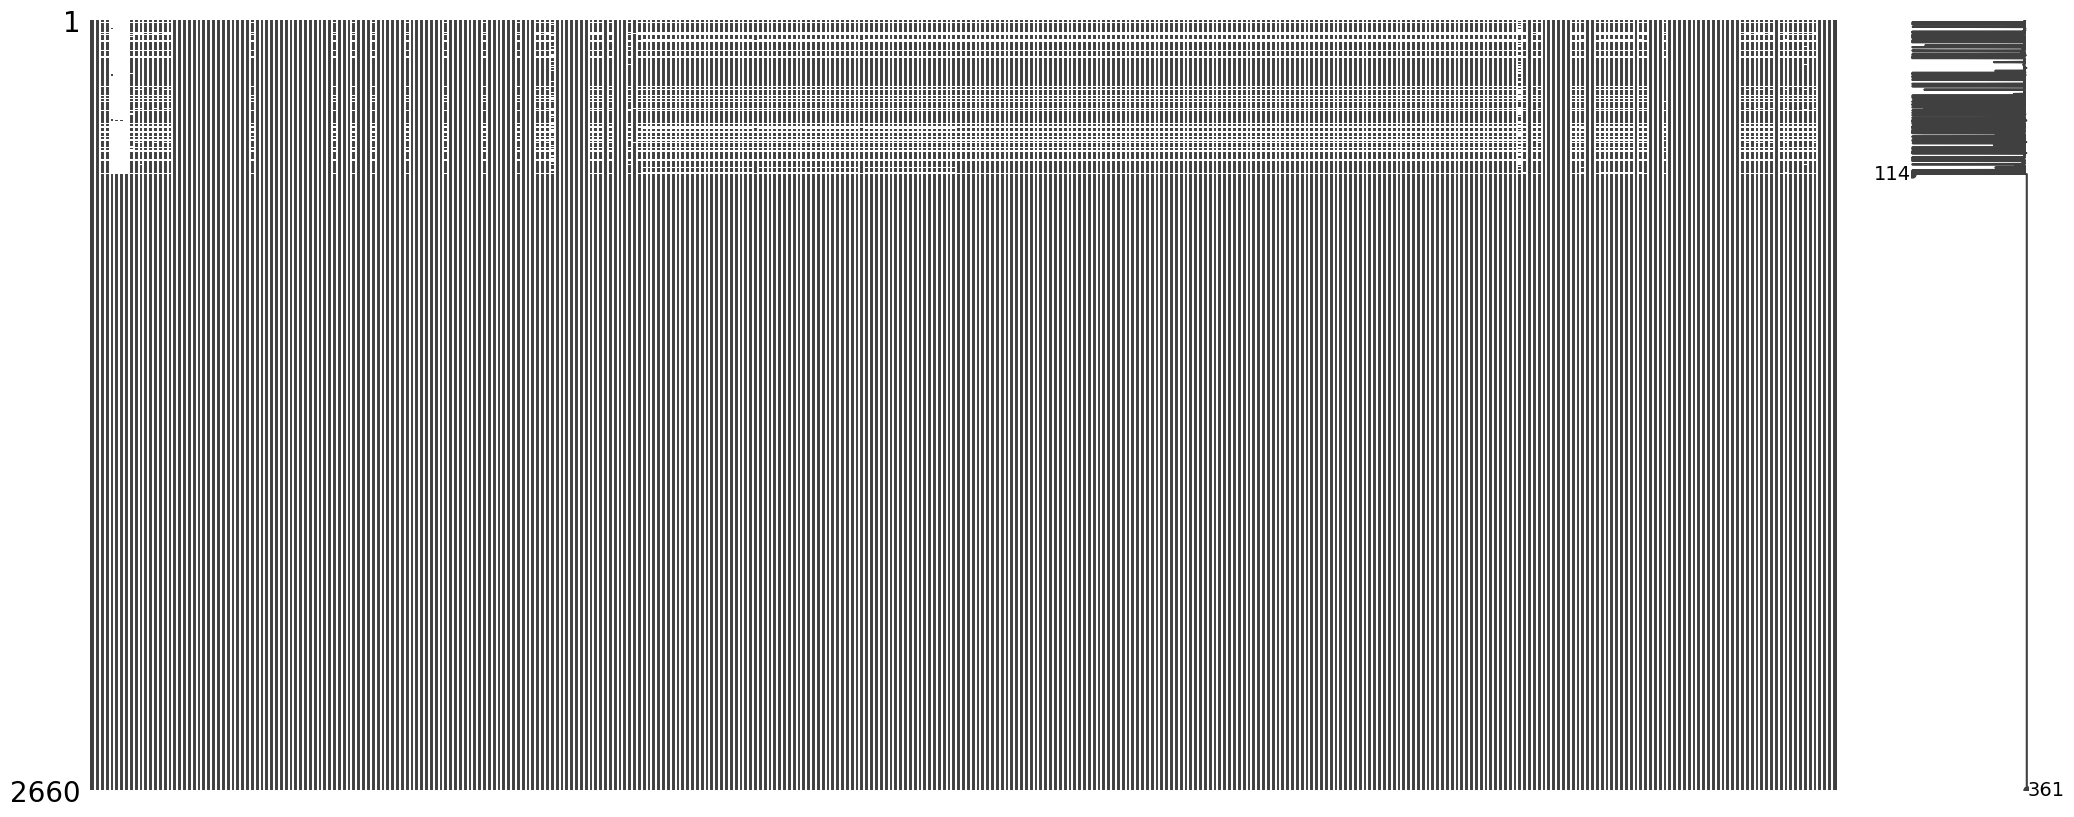

In [58]:
# Visualizing missing values in the selected numeric columns
msno.matrix(df_train_balanced[balanced_numeric_cols])

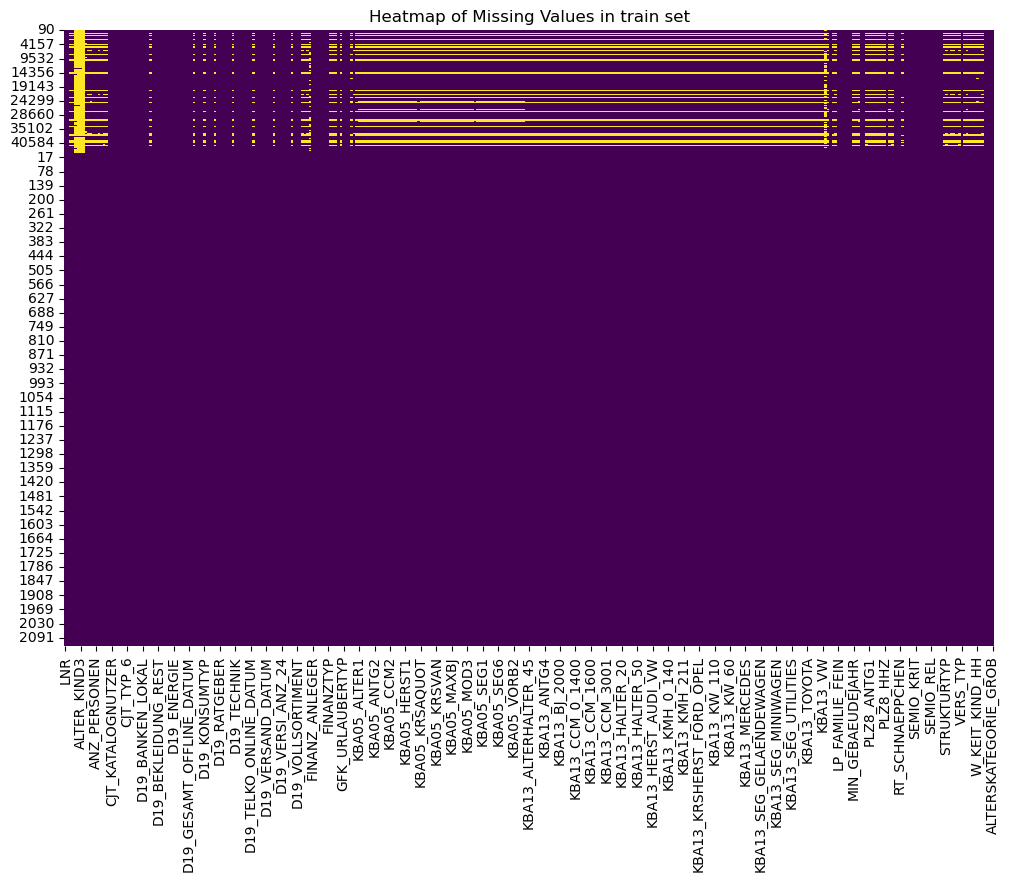

In [59]:
# Missing Data Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_train_balanced[balanced_numeric_cols].isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values in train set")
plt.show()

#### 4.3.2 Statistical Method to Analyze Missing Data

The project applies advanced techniques, such as Little’s MCAR test, to analyze missing data.

**Introduction to Little’s MCAR Test**  
Little’s MCAR test assesses whether missing values in the dataset are completely random. This assumption is critical for certain imputation techniques. If the null hypothesis of MCAR is rejected, it indicates the need for more sophisticated methods to handle missing data.

**Interpretation of Results**  
The test results are carefully analyzed. For example:
- If the null hypothesis of MCAR is rejected (p-value < 0.05), it implies that missing values are not completely random. This finding necessitates targeted imputation techniques to address potential patterns in the missing data.

**Relevance of MCAR in Data Science**  
MCAR testing is significant because:
- Handling missing values without understanding their randomness pattern may introduce bias into models.
- This test guides the choice of missing data handling strategies, such as imputing values based on correlations or relationships between features, to maintain data integrity.

By integrating these detailed explanations, I aim to enhance the overall clarity and effectiveness of the project.


In [60]:
def little_mcar_test(df, epsilon=1e-10):
    """
    Performs Little's MCAR (Missing Completely At Random) test with covariance regularization.
    
    Parameters:
        df (DataFrame): A pandas DataFrame with missing values.
        epsilon (float): Small value added to the diagonal of the covariance matrix for stability.
        
    Returns:
        A dictionary containing the chi-square statistic, p-value, and degrees of freedom.
    """
    # Drop rows with no missing values
    df_missing = df[df.isnull().any(axis=1)]
    df_complete = df.dropna()
    
    # Compute means and covariance for complete data
    mean_complete = df_complete.mean()
    cov_complete = np.cov(df_complete, rowvar=False)
    
    # Regularize the covariance matrix (add small epsilon to the diagonal)
    cov_complete += np.eye(cov_complete.shape[0]) * epsilon
    
    # Compute the test statistic
    test_statistic = 0
    for i in range(len(df_missing)):
        obs = df_missing.iloc[i]
        mask = ~obs.isnull()
        obs_filled = obs[mask]
        mean_diff = obs_filled - mean_complete[mask]
        cov_subset = cov_complete[np.ix_(mask, mask)]
        
        # Regularize subset covariance matrix
        cov_subset += np.eye(cov_subset.shape[0]) * epsilon
        
        test_statistic += mean_diff.T @ np.linalg.inv(cov_subset) @ mean_diff
    
    # Degrees of freedom
    dof = sum(df.isnull().sum())
    
    # Compute p-value
    p_value = 1 - stats.chi2.cdf(test_statistic, dof)
    
    return {"chi2": test_statistic, "p-value": p_value, "dof": dof}

# Usage Example
result = little_mcar_test(df_train_balanced[balanced_numeric_cols])
print("Little's MCAR Test Results:")
print(result)

Little's MCAR Test Results:
{'chi2': 2660000496242.001, 'p-value': 0.0, 'dof': 26299}


##### Interpretation of Little's MCAR Test Results:
The p-value of 0.0 (rounded for computational precision) is far below any conventional threshold (e.g., 0.05 or 0.01).  
This strongly suggests that the missing data is not completely random, indicating a statistically significant deviation from the MCAR assumption.  
As a result, the null hypothesis (MCAR) is rejected, and the missingness is likely dependent on certain features or patterns within the dataset.  
Given this result, I have opted for median imputation as a robust method to handle missing values, as it reduces the influence of outliers and preserves the dataset’s overall distribution.

## <a class="anchor" id="Data_Cleaning"><span style="color:#0d47a1">4.4 Data Cleaning</a><span>

In [61]:
# Assign all columns except 'RESPONSE' to df_train_balanced_X
df_train_balanced_X = df_train_balanced.drop(columns=['RESPONSE'])

# Assign only the 'RESPONSE' column to df_train_balanced_y
df_train_balanced_y = df_train_balanced['RESPONSE']

In [62]:
#Data Cleaning
cleaned_df_train_balanced_X = clean_dataframes(df_train_balanced_X)

#Data Preprocessing
preprocessed_df_train_balanced_X = preprocess_dataframe(cleaned_df_train_balanced_X, is_train=True)

In [63]:
# Splitting Data into Train and Test set
X_train, X_test, y_train, y_test = train_test_split(preprocessed_df_train_balanced_X, df_train_balanced_y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2128, 522), (532, 522), (2128,), (532,))

In [64]:
# Feature Scaling
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## <a class="anchor" id="Fitting_and_Predicting_Classification_Models"><span style="color:#0d47a1">4.5 Fitting and Predicting on Classification Models</a><span>

In [65]:
#Instantiating Classification Models 
rfc = RandomForestClassifier(random_state=42)
bagging = BaggingClassifier(random_state=42)
adaboost = AdaBoostClassifier(random_state=42)
gradientboost = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

In [66]:
def model_fit_predict(models, X_train, y_train, X_test, y_test):
    """
    Fits the models on the training data, predicts on the test data, 
    and computes performance metrics for each model.

    Parameters:
    - models: Dictionary of model names and model instances.
    - X_train, y_train: Training data.
    - X_test, y_test: Testing data.

    Returns:
    - results: Dictionary containing metrics for all models.
    """
    results = {}
    
    for name, model in models.items():
        start_time = time()
        print(f"Fitting {name}... Start Time: {ctime(start_time)}")
        
        # Train the model and record training time
        model.fit(X_train, y_train)
        train_time = time() - start_time
        print(f"Fitting {name}... End Time: {ctime(time())} | Training Time: {train_time:.4f}s")
        print()
        
        # Predictions
        y_pred = model.predict(X_test)
        
        # Metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        
        # ROC AUC and Precision-Recall AUC
        roc_auc = None
        precision_recall_auc = None
        #if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba)
        precision_recall_auc = auc(recall_vals, precision_vals)  # Correct calculation of AUC

        # Store results
        results[name] = {
            "Train Time": train_time,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1_Score": f1,
            "roc_auc_score": roc_auc,
            "Precision-Recall AUC": precision_recall_auc
        }
    
    return results

In [67]:
def print_metrics(results):
    """
    Returns a summary of metrics for all models in tabular format.

    Parameters:
    - results: Dictionary of metrics for each model.

    Returns:
    - A pandas DataFrame summarizing all metrics.
    """
    # Convert dictionary to DataFrame
    results_df = pd.DataFrame.from_dict(results, orient='index')
    results_df.reset_index(inplace=True)
    results_df.rename(columns={'index': 'Model'}, inplace=True)
    return results_df  

In [68]:
# Dictionary of classification models to train and evaluate  
models = {
    "Random Forest Classifier": rfc,
    "Bagging Classifier": bagging,
    "AdaBoost Classifier": adaboost,
    "Gradient Boosting Classifier": gradientboost,
    "XGBoost Classifier": xgb
}

# Train models, make predictions, and store results  
results = model_fit_predict(models, X_train_scaled, y_train, X_test_scaled, y_test)

# Print evaluation metrics for all models  
print_metrics(results)

Fitting Random Forest Classifier... Start Time: Sat Mar 22 10:25:52 2025
Fitting Random Forest Classifier... End Time: Sat Mar 22 10:25:53 2025 | Training Time: 1.1566s

Fitting Bagging Classifier... Start Time: Sat Mar 22 10:25:53 2025
Fitting Bagging Classifier... End Time: Sat Mar 22 10:25:55 2025 | Training Time: 1.9236s

Fitting AdaBoost Classifier... Start Time: Sat Mar 22 10:25:55 2025
Fitting AdaBoost Classifier... End Time: Sat Mar 22 10:25:58 2025 | Training Time: 2.4812s

Fitting Gradient Boosting Classifier... Start Time: Sat Mar 22 10:25:58 2025
Fitting Gradient Boosting Classifier... End Time: Sat Mar 22 10:26:10 2025 | Training Time: 12.2356s

Fitting XGBoost Classifier... Start Time: Sat Mar 22 10:26:10 2025
Fitting XGBoost Classifier... End Time: Sat Mar 22 10:26:11 2025 | Training Time: 1.3219s



,Model,Train Time,Accuracy,Precision,Recall,F1_Score,roc_auc_score,Precision-Recall AUC
0,Random Forest Classifier,1.156564,0.951128,0.957447,0.803571,0.873786,0.987670,0.959726
1,Bagging Classifier,1.923559,0.939850,0.944444,0.758929,0.841584,0.975489,0.934248
2,AdaBoost Classifier,2.481174,0.953008,0.906542,0.866071,0.885845,0.989923,0.965932
3,Gradient Boosting Classifier,12.235589,0.966165,0.951923,0.883929,0.916667,0.994154,0.980563
4,XGBoost Classifier,1.321886,0.971805,0.961905,0.901786,0.930876,0.993899,0.981619


### Recommended Metric

Given the imbalance in the dataset and the objective of identifying positive responses (RESPONSE=1), it is better to focus on **Precision-Recall AUC**. This metric is specifically designed for imbalanced datasets and highlights how well the model balances precision and recall for the minority class.

#### Why Precision-Recall AUC?
- It focuses on the minority class (positive responses), aligning with the project's primary objective.
- It provides a comprehensive view of the trade-off between precision and recall, ensuring neither is disproportionately prioritized.

#### Why Not Other Metrics?

1. **Why Not Accuracy?**
   - Accuracy disregards class imbalance and can be misleading in scenarios where the majority class dominates. A model could achieve high accuracy by predicting only the majority class, which does not align with the project’s objective.

2. **Why Not Only Precision or Recall?**
   - **Precision**: While it ensures that positive predictions are mostly correct, it does not account for how many actual positives are missed (low recall).
   - **Recall**: While it ensures that most actual positives are identified, it may lead to many false positives if precision is low.
   - Both metrics individually fail to provide a balanced assessment, which is critical for this project.

3. **Why Not F1 Score?**
   - The F1 Score is the harmonic mean of precision and recall. While it balances precision and recall, it provides a single value, which may not offer as much insight into the model’s performance as Precision-Recall AUC.
   - In imbalanced datasets, F1 may undervalue models that perform well in one metric (e.g., recall) but moderately in another (e.g., precision), potentially obscuring important trade-offs.

4. **Why Not ROC-AUC?**
   - ROC-AUC evaluates the model's ability to distinguish between classes but can be less sensitive to the performance of the minority class. It is often dominated by the majority class, leading to over-optimistic evaluations in imbalanced scenarios.

## <a class="anchor" id="GridSearchCV_Finding_Best_Parameters"><span style="color:#0d47a1">4.6 GridSearchCV : Finding Best Parameters</a><span>

### Why Am I Not Using `GridSearchCV` and Implementing My Own Grid Search?

While **Scikit-Learn’s `GridSearchCV`** is a standard approach for hyperparameter tuning, I have opted to implement my **own grid search function** for XGBoost due to the following reasons:

#### 1️⃣ Previous Issues with `GridSearchCV` on XGBoost  
When attempting to use `GridSearchCV` with `XGBClassifier`, I encountered problems (previously discussed in this chat). Some possible reasons for issues were:  
- **Handling of early stopping**: XGBoost has built-in early stopping, which `GridSearchCV` does not leverage effectively.  
- **Incompatibility with `use_label_encoder=False`**: XGBoost requires `use_label_encoder=False` and `eval_metric='logloss'`, but `GridSearchCV` does not pass these seamlessly.  
- **Performance bottlenecks**: `GridSearchCV` internally uses **cross-validation**, which means **retraining multiple times** for each parameter combination, significantly increasing computation time.  

#### 2️⃣ Faster Execution with Train-Test Split Instead of Cross-Validation  
- `GridSearchCV` performs **k-fold cross-validation**, which is computationally expensive because it trains the model **multiple times** for each fold.  
- Instead, I **manually split the data into a training and validation set** (`train_test_split`) and evaluate on a single validation set, making the process much faster.  

#### 3️⃣ More Control Over Model Evaluation  
- I am **directly evaluating Precision-Recall AUC (`PR-AUC`)**, which is **more relevant for imbalanced datasets** than default scoring metrics used by `GridSearchCV`.  
- `GridSearchCV` does not provide **custom evaluation logic**, while my implementation allows **direct access to model predictions and PR curve calculations**.  

#### 4️⃣ Custom Logging and Progress Tracking  
- In my approach, I **print progress updates** every 50 iterations, which is helpful for tracking long-running hyperparameter searches.  
- `GridSearchCV` does not provide intermediate progress updates without additional verbose logging, making it harder to monitor in real time.  

---

### ✅ Conclusion: Why This Approach?  
By writing my own grid search for XGBoost, I gain:  
✔ **Better performance** (avoiding unnecessary retraining through cross-validation).  
✔ **More control** over the evaluation metric (`PR-AUC`).  
✔ **Flexibility** in handling XGBoost-specific parameters.  
✔ **Faster execution** than `GridSearchCV`, which is useful for large datasets.  

Thus, while `GridSearchCV` is generally preferred by professionals, my custom approach is justified based on these practical considerations.

In [69]:
# Split the dataset into training and testing sets for XGBoost Grid Search
xgb_X_train, xgb_X_test, xgb_y_train, xgb_y_test = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

In [70]:
# Hyperparameter grid for XGBoost tuning  
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.5],
    'max_depth': [2, 6],
    'min_child_weight': [1, 4],
    'gamma': [00.1, 0.5],
    'colsample_bytree': [0.2, 0.7],
    'subsample': [0.6, 1.0]
}

# Default parameter combination (Example: Using commonly used defaults)
default_combination = (
    100,   # n_estimators (from grid)
    0.05,  # learning_rate (from grid)
    2,     # max_depth (from grid)
    1,     # min_child_weight (from grid)
    0.1,   # gamma (from grid)
    0.2,   # colsample_bytree (from grid)
    0.6    # subsample (from grid)
)

# Create combinations of parameters
param_combinations = list(product(
    param_grid_xgb['n_estimators'],
    param_grid_xgb['learning_rate'],
    param_grid_xgb['max_depth'],
    param_grid_xgb['min_child_weight'],
    param_grid_xgb['gamma'],
    param_grid_xgb['colsample_bytree'],
    param_grid_xgb['subsample']
))

# Add the default parameter option
param_combinations.append(default_combination)

# Print the number of combinations
print('Number of parameter combinations =', len(param_combinations))

Number of parameter combinations = 129


In [71]:
# Track the best parameters and score
best_score = 0
best_params = {}
i = 1

# Perform grid search manually
print("Total Number of iterations through grid search = ", len(param_combinations))

# Get the current date and time
current_datetime = datetime.now()
print("Start: date and time:", current_datetime)
start = time() # Get start time

# Perform grid search manually
for params in param_combinations:
    if params == (None,):  # Check if using default parameters
        model = XGBClassifier(
            random_state=42, 
            use_label_encoder=False, 
            eval_metric='logloss'
        )
    else:
        n_estimators, learning_rate, max_depth, min_child_weight, gamma, colsample_bytree, subsample = params
        model = XGBClassifier(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            max_depth=max_depth,
            min_child_weight=min_child_weight,
            gamma=gamma,
            colsample_bytree=colsample_bytree,
            subsample=subsample,
            random_state=42,
            use_label_encoder=False,
            eval_metric='logloss'
        )

    # Print progress
    if (i % 50) == 0:
        print(f'This is {i}th iteration')
    i += 1

    # Train the model
    model.fit(xgb_X_train, xgb_y_train)

    # Predict probabilities for the test set
    y_pred_proba = model.predict_proba(xgb_X_test)[:, 1]

    # Calculate Precision-Recall curve
    precision, recall, _ = precision_recall_curve(xgb_y_test, y_pred_proba)

    # Calculate PR-AUC score
    score = auc(recall, precision)

    # Update the best score and parameters if the current score is better
    if score > best_score:
        best_score = score
        if params == (None,):
            best_params = 'Default Parameters'
        else:
            best_params = {
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'min_child_weight': min_child_weight,
                'gamma': gamma,
                'colsample_bytree': colsample_bytree,
                'subsample': subsample
            }

current_datetime = datetime.now()
print("End: date and time:", current_datetime)
end = time() # Get end time
print(f"GridSearch time for XGBoost: {end-start} Seconds")

# Print the best parameters and score
print(f"Best Score (PR-AUC): {best_score}")
print(f"Best Parameters: {best_params}")

Total Number of iterations through grid search =  129
Start: date and time: 2025-03-22 10:26:12.042091
This is 50th iteration
This is 100th iteration
End: date and time: 2025-03-22 10:28:16.481439
GridSearch time for XGBoost: 124.44135618209839 Seconds
Best Score (PR-AUC): 0.9673559292197437
Best Parameters: {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 1, 'gamma': 0.5, 'colsample_bytree': 0.7, 'subsample': 1.0}


## <a class="anchor" id="Testing_Best_model_with_Best_Parameters"><span style="color:#0d47a1">4.7 Testing Best model with Best Parameters</a><span>

In [72]:
#XGBoost Model with Best Parameters
xgb = XGBClassifier(n_estimators = 200, learning_rate = 0.05, max_depth = 6, min_child_weight = 1, gamma = 0.5, colsample_bytree = 0.7, subsample = 1.0, random_state=42)

In [73]:
# Dictionary of XGBoost classification model to train and evaluate  
models = {
    "XGBoost": xgb
}

# Train models, make predictions, and store results  
results = model_fit_predict(models, X_train_scaled, y_train, X_test_scaled, y_test)

# Print evaluation metrics for XGBoost model
print_metrics(results)

Fitting XGBoost... Start Time: Sat Mar 22 10:28:16 2025
Fitting XGBoost... End Time: Sat Mar 22 10:28:19 2025 | Training Time: 3.1111s



,Model,Train Time,Accuracy,Precision,Recall,F1_Score,roc_auc_score,Precision-Recall AUC
0,XGBoost,3.11107,0.969925,0.961538,0.892857,0.925926,0.994537,0.98265


### Selction of Best Classification Model:

- Considering the overall performance metrics, **XGBoost** with Best parameters is selected as the final model for this task due to its superior Precision-Recall AUC score, superior ROC-AUC score, and efficient training time.

In [74]:
#Saving Best Model, Scaler & Required variable to be used for Web App

# `xgb` is Best Classification Model
joblib.dump(xgb, "../model/xgboost_model.pkl")

# `sc` is trained StandardScaler used for feature scaling
joblib.dump(sc, "../model/scaler.pkl")

df_train_feature_names = preprocessed_df_train_balanced_X.columns
train_features = preprocessed_df_train_balanced_X.columns

#Checkdelete
# Save it to a pickle file
joblib.dump(train_features, "../model/train_features.pkl")

['../model/train_features.pkl']

# <a class="anchor" id="Predict_Results_from_Test_Data_using_Best_Supervised_Learning_Model_df_test"><span style="color:#0d47a1; font-weight:bold">Part 5 : Predict Results from Test Data using Best Supervised Learning Model `(df_test)`</a>

In [75]:
#Prinitng Test Set shape
print("df_test shape = ",df_test.shape)

df_test shape =  (42833, 366)


## <a class="anchor" id="Data_Cleaning"><span style="color:#0d47a1">5.1 : Data Cleaning</a></span>

In [76]:
#Data Cleaning
cleaned_df_test = clean_dataframes(df_test)
preprocessed_df_test = preprocess_dataframe(cleaned_df_test, is_test=True, df_train_feature_names = df_train_feature_names)

In [77]:
# Feature Scaling
preprocessed_df_test_scaled = sc.transform(preprocessed_df_test)

## <a class="anchor" id="Predicting_Results_for_Test_Data"><span style="color:#0d47a1">5.2 : Predicting Results for Test Data</a></span>

In [78]:
#Predicting Final Positive Response Results
df_test_y_pred = xgb.predict(preprocessed_df_test_scaled)

#Printing No of Positive Response Results
print("No. of Customers in Test Dataset(df_test) = ",df_test.shape[0])
print("No. of Positive Response Results predicted = ",df_test_y_pred.sum())

No. of Customers in Test Dataset(df_test) =  42833
No. of Positive Response Results predicted =  6117


# <a class="anchor" id="Final_Segmentation_Reports_and_Prediction_Results"><span style="color:#0d47a1; font-weight:bold">Part 6 : Final Segmentation Reports and Prediction Results</a></span>

## <a class="anchor" id="Customer_Segmentation_Report_df"><span style="color:#0d47a1">6.1 : Customer Segmentation Final Report for General Population Data `(df)`</a></span>

## 1️⃣ Objective  
This report presents the findings from the segmentation analysis of the `df` dataset, which contains demographic and lifestyle data representing the general population of Germany. The analysis employed unsupervised learning techniques to identify clusters of individuals with similar attributes, providing actionable insights for targeted marketing.  

---  

## 2️⃣ Dataset Overview  
The `df` dataset underwent extensive preprocessing, including:  

✔ **Scaling and imputing missing values**  
✔ **Application of PCA** to reduce dimensions while preserving 95% of the variance  
✔ **Post-PCA Data Shape:** The reduced dataset contained over **890,000 records** with significantly fewer features, enhancing computational efficiency and interpretability  

---  

## 3️⃣ Methodology and Key Steps  

### ➡️ 3.1 Dimensionality Reduction  
PCA was used to retain essential information and eliminate redundancy in the dataset. This step ensured efficient clustering of the data.  

### ➡️ 3.2 Optimal Clustering  
The optimal number of clusters was determined using the **Elbow Method**, where the Within-Cluster Sum of Squares (WCSS) was plotted against the number of clusters. The "elbow" observed at **4 clusters** indicated the most suitable balance between complexity and interpretability.  

### ➡️ 3.3 KMeans Clustering  
Using **KMeans with 4 clusters**, individuals were grouped into distinct segments that share common demographic and lifestyle characteristics.  

---  

## 4️⃣ Findings from Clustering Analysis  
The general population was categorized into **4 key clusters**, described below:  

- **Cluster 0:**  
   - ✔ **Size:** Largest group  
   - ✔ **Demographics:** Dominated by middle-aged individuals  
   - ✔ **Key Features:** Strong inclination towards stability in residence duration  

- **Cluster 1:**  
   - ✔ **Size:** Medium-sized segment  
   - ✔ **Demographics:** Younger demographic, active in urban settings  
   - ✔ **Distinct Traits:** Interest in modern, technology-driven products  

- **Cluster 2:**  
   - ✔ **Size:** Smaller cluster  
   - ✔ **Key Behaviors:** Strong alignment with traditional values  
   - ✔ **Key Insights:** Higher representation in rural or suburban areas  

- **Cluster 3:**  
   - ✔ **Size:** Smallest cluster  
   - ✔ **Behavior:** High diversity in purchasing preferences, from luxury to budget-conscious items  

---  

## 5️⃣ Business Implications  
The segmentation insights from the general population can support business strategies as follows:  

- 🎯 **Personalized Outreach:** Design marketing campaigns tailored to the needs and preferences of each cluster  
- 📈 **Enhanced Customer Acquisition:** Focus resources on clusters more likely to convert into loyal customers  
- 🌍 **Market Penetration:** Develop region-specific strategies for clusters predominantly residing in particular geographic areas  

---  

## 6️⃣ Limitations and Recommendations  

- ⚠ **Data Imputation:** Mean imputation for missing values may oversimplify the dataset and overlook subtle trends  
- ⚠ **Clustering Assumptions:** The use of Euclidean distance in KMeans may not capture complex, non-linear relationships in the data  
- 🔎 **Further Exploration:** Incorporate additional clustering techniques, such as hierarchical clustering or DBSCAN, to validate and refine these results  

---  

> ✅ *This segmentation provides a foundational understanding of Germany's general population and guides subsequent analyses, including predictive modeling.*  

## <a class="anchor" id="Customer_Segmentation_Report_df_customers"><span style="color:#0d47a1">6.2 : Customer Segmentation Final Report for Customer Data `(df_customers)`</a></span>

## 1️⃣ Objective  
The aim of this report is to summarize the findings from the customer segmentation analysis performed on the `df_customers` dataset. This analysis utilized clustering methods to identify distinct customer groups, leveraging unsupervised learning techniques like Principal Component Analysis (PCA) and KMeans clustering.  

---  

## 2️⃣ Dataset Overview  
The `df_customers` dataset includes attributes representing demographic and behavioral data of existing customers. After preprocessing, the dataset was scaled, imputed for missing values, and subjected to dimensionality reduction.  

✔ **Post-PCA Data Shape:** The reduced dataset contained **191,652 samples** with **329 principal components**, preserving 95% of the variance.  

---  

## 3️⃣ Methodology and Key Steps  

### ➡️ 3.1 Dimensionality Reduction  
PCA was applied to reduce data dimensionality while retaining key patterns. This step addressed multicollinearity and improved computational efficiency.  

### ➡️ 3.2 Optimal Clustering  
The optimal number of clusters was determined using the **elbow method**, which plots within-cluster sum of squares (WCSS) for various values of *k*.  

### ➡️ 3.3 KMeans Clustering  
The **KMeans algorithm** was employed to partition customers into distinct clusters. Each cluster represents a unique segment with shared characteristics.  

---  

## 4️⃣ Findings from Clustering Analysis  
The customer base was segmented into **4 primary clusters**, each described below:  

- **Cluster 0:**  
   - ✔ **Size:** Largest cluster  
   - ✔ **Demographics:** Predominantly older age groups  
   - ✔ **Key Features:** High variance in `LNR` and stability in `WOHNDAUER` (residence duration)  

- **Cluster 1:**  
   - ✔ **Size:** Moderate-sized segment  
   - ✔ **Demographics:** Diverse age distribution with higher income stability  
   - ✔ **Distinct Traits:** Consistently high representation of luxury buyers  

- **Cluster 2:**  
   - ✔ **Size:** Medium-sized cluster  
   - ✔ **Key Behaviors:** Active in purchasing insurance products  
   - ✔ **Geographic Pattern:** Predominantly Western Germany (`OST_WEST_KZ` = 'W')  

- **Cluster 3:**  
   - ✔ **Size:** Smallest group  
   - ✔ **Behavior:** Limited purchase activity but notable for unique niche product interests  

---

### ✅ Key Categorical Insights Across Clusters  
- Variables such as **`CAMEO_DEU_2015`** (socioeconomic classification) and **`D19_LETZTER_KAUF_BRANCHE`** (last purchase category) played a significant role in differentiating clusters.  

---  

## 5️⃣ Business Implications  
This segmentation provides actionable insights for marketing strategies:  

- 🎯 **Targeted Campaigns:** Design cluster-specific marketing strategies to cater to the unique preferences and purchasing behaviors  
- 📊 **Resource Allocation:** Allocate resources efficiently to high-value clusters, such as those with higher income stability and active purchasing patterns  
- 🤝 **Customer Retention:** Use insights to enhance personalized experiences for the most loyal and lucrative customer segments  

---  

## 6️⃣ Limitations and Recommendations  

- ⚠ **Data Limitations:** Missing data imputation may oversimplify real-world customer behaviors, potentially affecting the clustering outcome  
- ⚠ **Model Limitations:** KMeans' reliance on Euclidean distance may struggle with non-linear relationships. Exploring other clustering techniques like **DBSCAN** could yield additional insights  

---  

> ✅ *This segmentation serves as a foundation for predictive modeling in subsequent phases, aiming to predict campaign responses and further optimize customer engagement.*  

## <a class="anchor" id="Prediction_Results_for_Test_Data"><span style="color:#0d47a1">6.3 : Prediction Results for Test Data</a></span>

In [79]:
#Printing No of Positive Response Results
print("No. of Customers in Test Dataset(df_test) = ",df_test.shape[0])
print("No. of Positive Response Results predicted = ",df_test_y_pred.sum())

No. of Customers in Test Dataset(df_test) =  42833
No. of Positive Response Results predicted =  6117


In [80]:
# Find indices of positive predictions
positive_indices = df_test_y_pred == 1

# Extract positively predicted users
df_positive_users = df_test.loc[positive_indices]

# Export the filtered data to a CSV file
df_positive_users.to_csv("positive_predicted_users.csv", index=False)

print("Exported positively predicted users to 'positive_predicted_users.csv'")

Exported positively predicted users to 'positive_predicted_users.csv'


# <a class="anchor" id="Conclusion_and_Key_Outcomes"><span style="color:#0d47a1; font-weight:bold">Part 7 : Conclusion and Key Outcomes</a></span>

The predictive model successfully identified customers within the test dataset who are likely to respond positively to the upcoming marketing campaign.  

### 🔎 Key Results:  
- **Total customers in test dataset:** 42,833  
- **Predicted positive responses:** 6,117  

### 💡 Business Interpretation:  
- Approximately **14.3%** of the test population (6,117 out of 42,833) are flagged as high-potential responders.  
- These individuals can be **targeted with tailored marketing efforts**, allowing the company to optimize resources and maximize ROI.  
- By focusing on these identified segments, the marketing team can **significantly reduce customer acquisition costs** while improving **conversion rates**.  

### 📈 Strategic Impact for Arvato Financial Solutions:  
- The combination of **customer segmentation** and **predictive modeling** provides a robust framework for **data-driven decision-making**.  
- This approach enables **smarter targeting**, **higher customer engagement**, and **increased profitability** in future campaigns.  

<p style="color:#800080; font-weight:bold">📂 The identified high-potential customers have been exported to <code>positive_predicted_users.csv</code> for immediate use in marketing initiatives.</p>

In [81]:
#Printing ipynb file to html file in same Project Path
InteractiveShell.ast_node_interactivity = "all"
call(['python', '-m', 'nbconvert', '--to', 'html', 'Bertelsmann_Arvato_Project.ipynb'])

0